[[8.42765010e+04 4.00000000e-02]
 [8.42766970e+04 8.00000000e-03]
 [8.42768920e+04 3.10000000e-02]
 ...
 [1.14996082e+05 5.00000000e-03]
 [1.14998231e+05 2.00000000e-03]
 [1.14998427e+05 2.00000000e-03]]


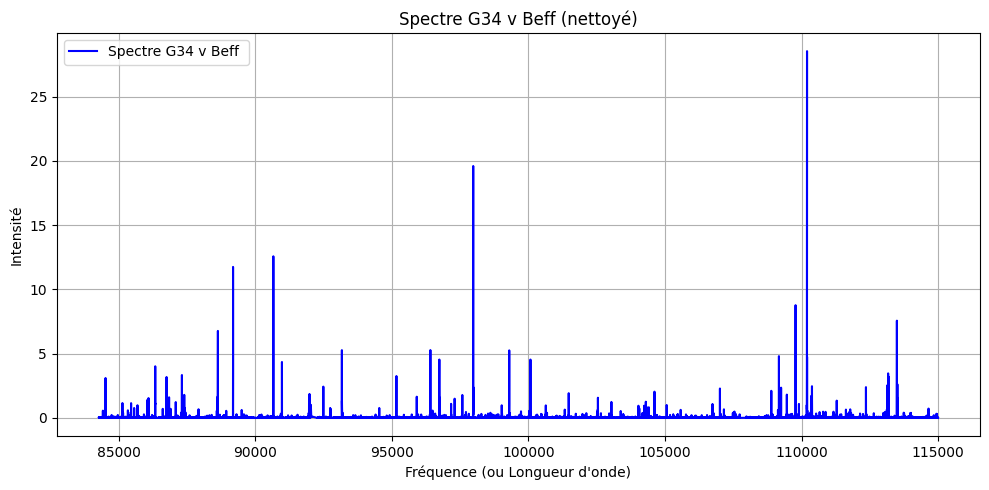

In [19]:
import numpy as np
import matplotlib.pyplot as plt


file_path = 'data/raw/complete_spectrum_G34_v_Beff.dat'
spectrum_data = np.loadtxt(file_path)



x = spectrum_data[:, 0] 
y = spectrum_data[:, 1] 


mask = y > 0
x_clean = x[mask]
y_clean = y[mask]


spectrum = np.column_stack((x_clean, y_clean))

print(spectrum)

plt.figure(figsize=(10, 5))
plt.plot(spectrum[:,0], spectrum[:,1], label='Spectre G34 v Beff ', color='blue')
plt.xlabel('Fréquence (ou Longueur d\'onde)')
plt.ylabel('Intensité')
plt.title('Spectre G34 v Beff (nettoyé)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

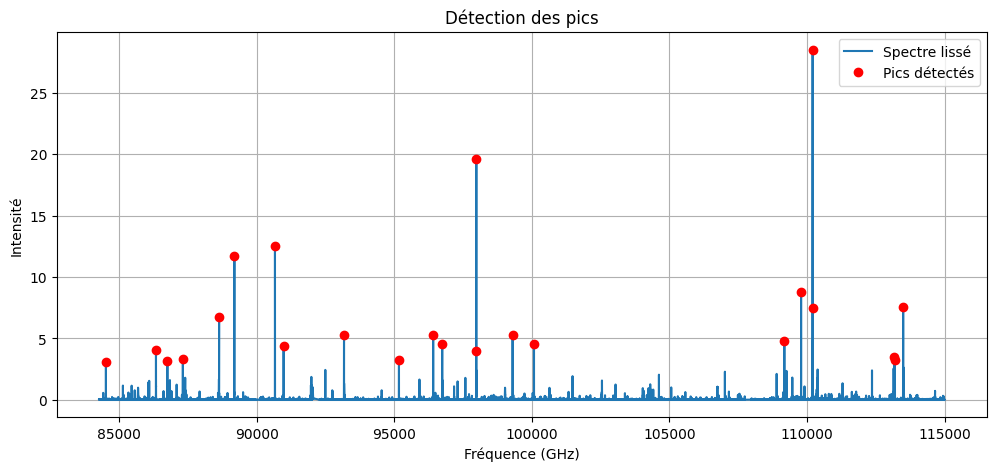

In [20]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(spectrum[:,1], height=0.1 * np.max(spectrum[:,1]), distance=10)
freq_peaks = spectrum[:, 0][peaks]

plt.figure(figsize=(12, 5))
plt.plot(spectrum[:, 0], spectrum[:,1], label='Spectre lissé')
plt.plot(freq_peaks, spectrum[peaks,1], 'ro', label='Pics détectés')
plt.xlabel('Fréquence (GHz)')
plt.ylabel('Intensité')
plt.title('Détection des pics')
plt.legend()
plt.grid()
plt.show()

[ 80000.1         80000.2         80000.3        ... 114999.80052154
 114999.90052154 115000.00052154]


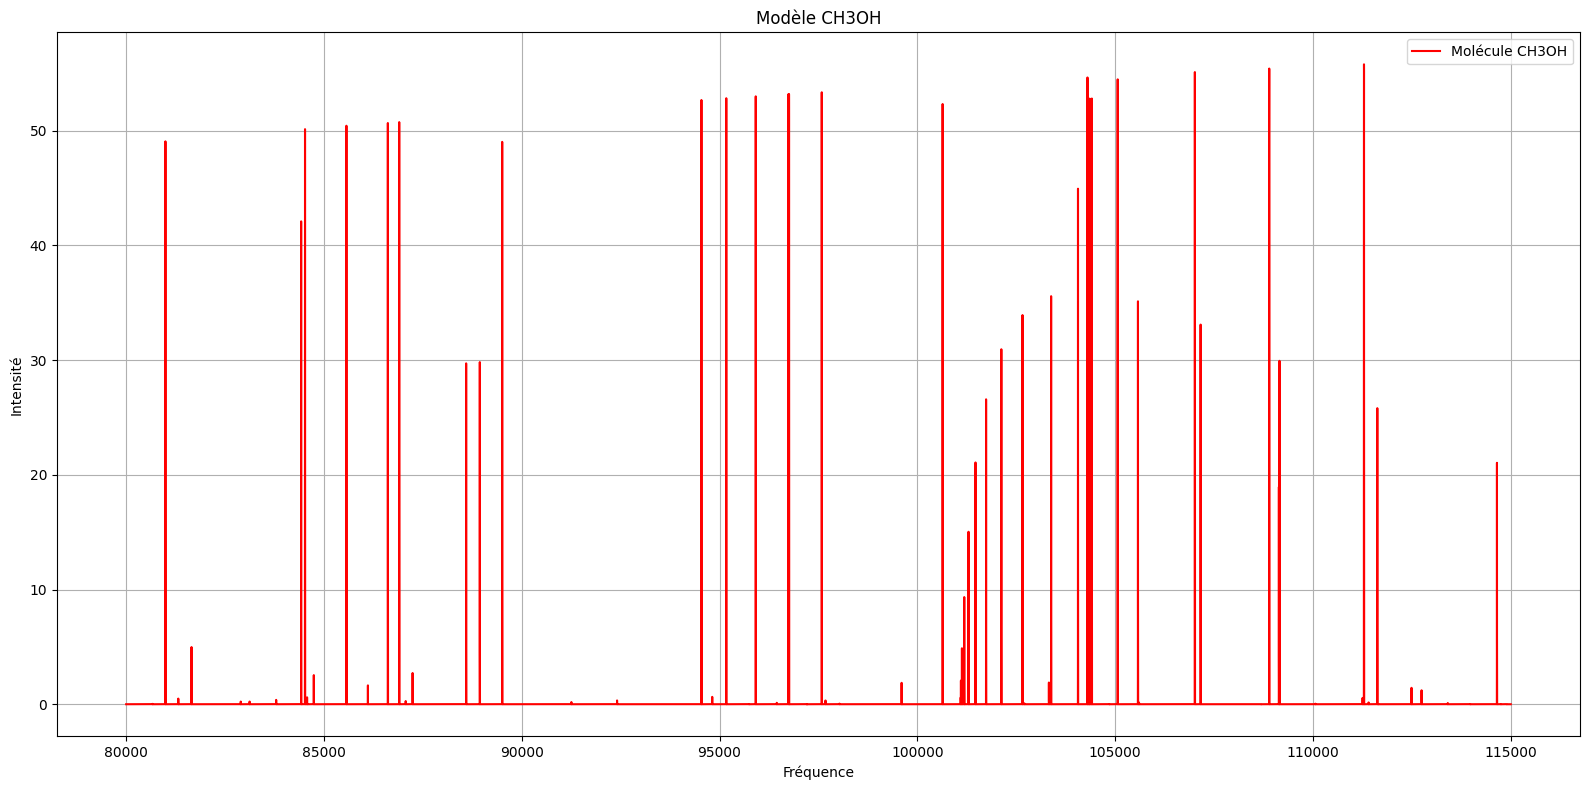

[ 80000.1         80000.2         80000.3        ... 114999.80052154
 114999.90052154 115000.00052154]


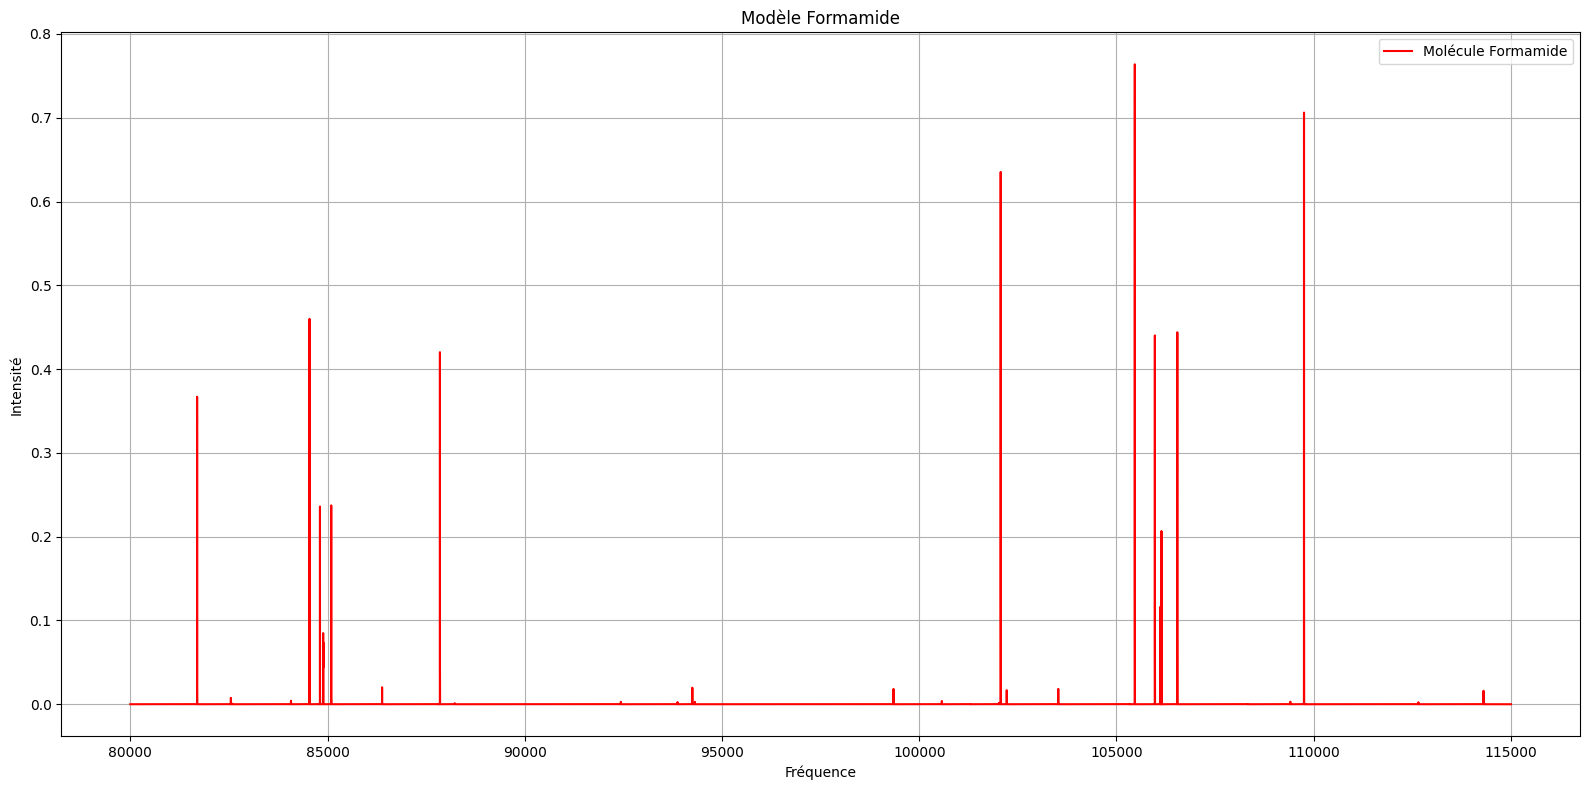

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict


molecules_file_path = {
         'data/molecule/Model_CH3OH.dat': 'CH3OH',
         'data/molecule/Model_formamide.dat': 'Formamide'
}


for file_path, molecule_name in molecules_file_path.items():
    molecule_data = np.loadtxt(file_path)
    freq_molecule = molecule_data[:, 0]
    intensity_molecule = molecule_data[:, 1]
    spectre_model = np.column_stack((freq_molecule, intensity_molecule))
    print(freq_molecule)

    plt.figure(figsize=(16, 8))
    plt.plot(spectre_model[:,0], spectre_model[:,1], label=f'Molécule {molecule_name}', color='red')
    plt.xlabel('Fréquence')
    plt.ylabel('Intensité')
    plt.title(f'Modèle {molecule_name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()




        




### Spectre sans normalisation

[ 80000.1         80000.2         80000.3        ... 114999.80052154
 114999.90052154 115000.00052154]


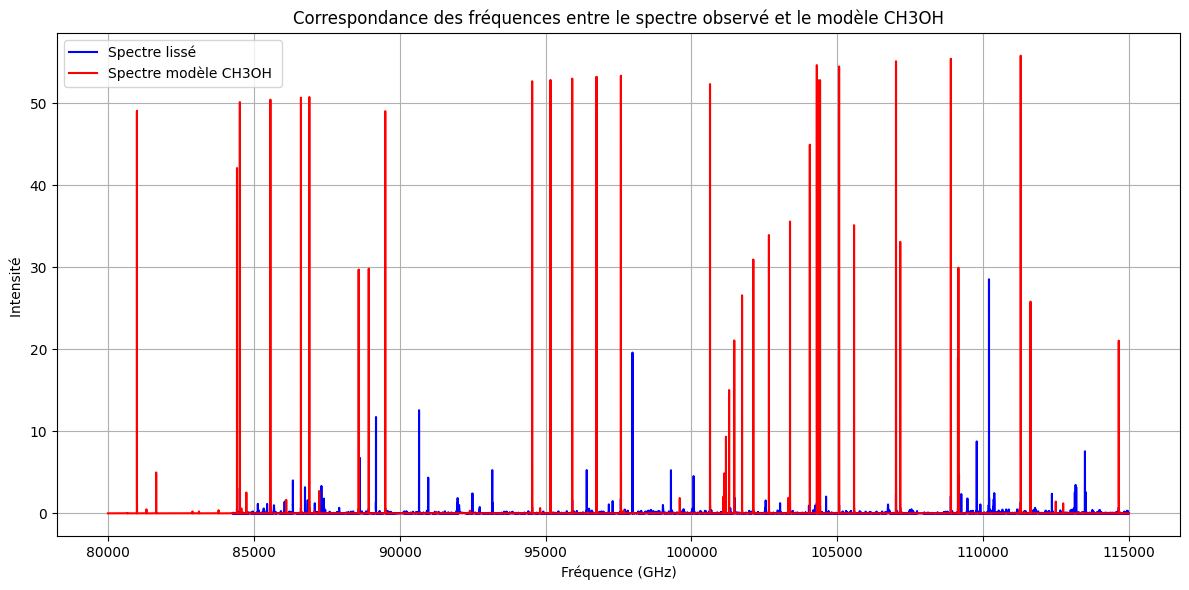

[ 80000.1         80000.2         80000.3        ... 114999.80052154
 114999.90052154 115000.00052154]


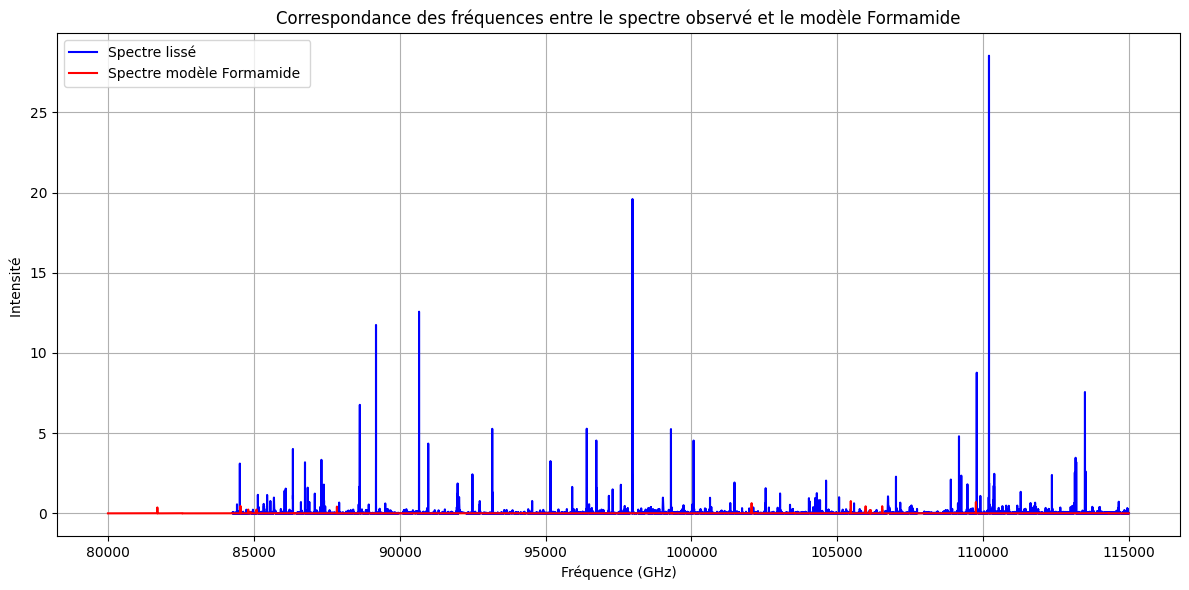

In [22]:


for file_path, molecule_name in molecules_file_path.items():
    molecule_data = np.loadtxt(file_path)
    freq_molecule = molecule_data[:, 0]
    intensity_molecule = molecule_data[:, 1]
    spectre_model = np.column_stack((freq_molecule, intensity_molecule))
    print(freq_molecule)

    plt.figure(figsize=(12, 6))
    plt.plot(spectrum[:, 0], spectrum[:,1], label='Spectre lissé ', color='blue')
    plt.plot(spectre_model[:, 0], spectre_model[:,1], label=f'Spectre modèle {molecule_name} ', color='red')
    plt.xlabel('Fréquence (GHz)')
    plt.ylabel('Intensité ')
    plt.title(f'Correspondance des fréquences entre le spectre observé et le modèle {molecule_name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Spectre avec normalisation

[ 80000.1         80000.2         80000.3        ... 114999.80052154
 114999.90052154 115000.00052154]
[1.36703004e-03 2.45364366e-04 1.05156157e-03 ... 1.40208209e-04
 3.50520523e-05 3.50520523e-05]


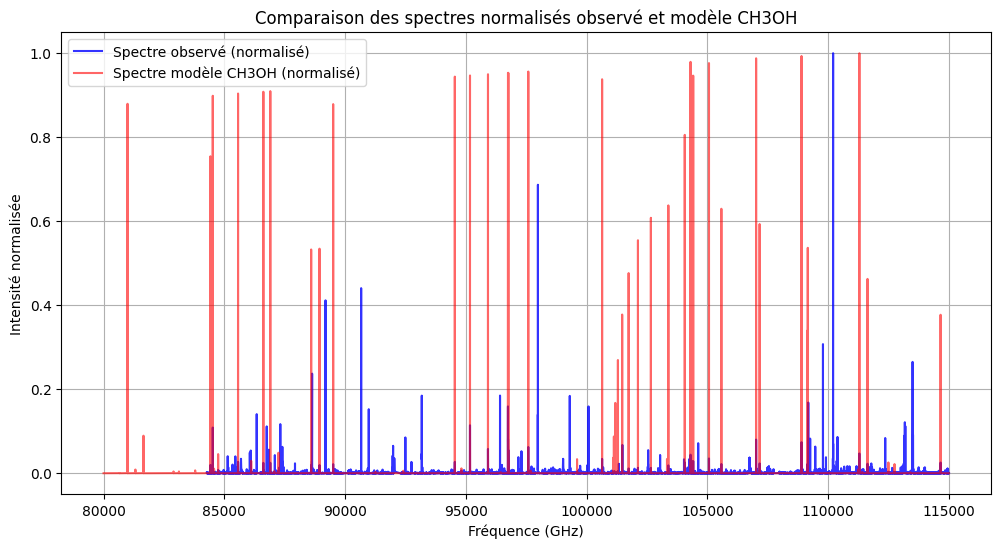

[ 80000.1         80000.2         80000.3        ... 114999.80052154
 114999.90052154 115000.00052154]
[1.36703004e-03 2.45364366e-04 1.05156157e-03 ... 1.40208209e-04
 3.50520523e-05 3.50520523e-05]


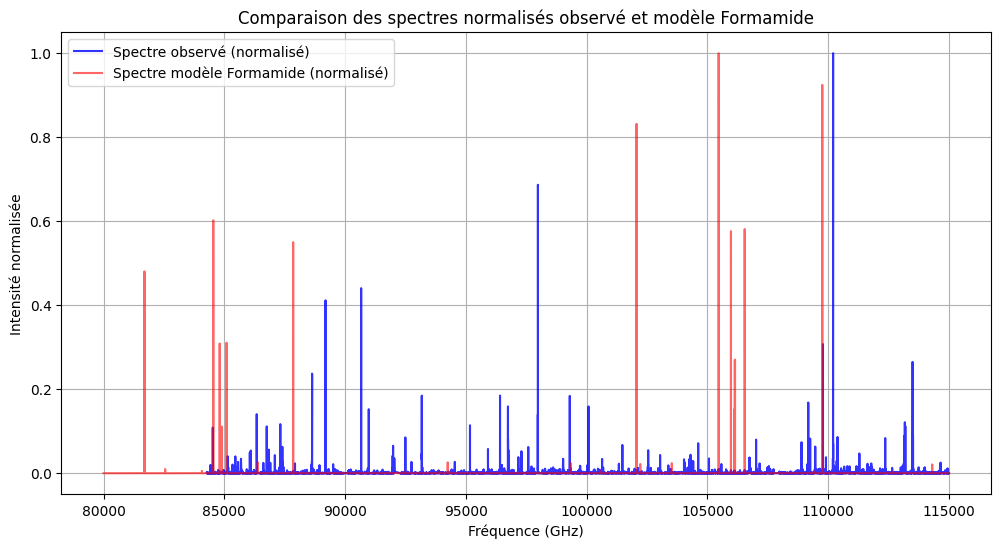

In [23]:
def normalize_spectrum(y):

    y_min = np.min(y)
    y_max = np.max(y)
    return (y - y_min) / (y_max - y_min) 

for file_path, molecule_name in molecules_file_path.items():
    molecule_data = np.loadtxt(file_path)
    freq_molecule = molecule_data[:, 0]
    intensity_molecule = molecule_data[:, 1]
    spectre_model = np.column_stack((freq_molecule, intensity_molecule))
    print(freq_molecule)

    spectrum_norm = normalize_spectrum(spectrum[:, 1])
    print(spectrum_norm)
    spectrum_model_norm = normalize_spectrum(spectre_model[:, 1])

    plt.figure(figsize=(12, 6))
    plt.plot(spectrum[:, 0], spectrum_norm, label='Spectre observé (normalisé)', color='blue', alpha=0.8)
    plt.plot(spectre_model[:, 0], spectrum_model_norm, label=f'Spectre modèle {molecule_name} (normalisé)', color='red', alpha=0.6)
    plt.xlabel('Fréquence (GHz)')
    plt.ylabel('Intensité normalisée')
    plt.title(f'Comparaison des spectres normalisés observé et modèle {molecule_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

### Segment avec spectre non normalisé

Segment 1/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184)]

Segment 1/50:
Pearson: 0.0234 (p-value: 0.3769)
RMSE: 0.0434, NMAE: 4.7981
Non significatif


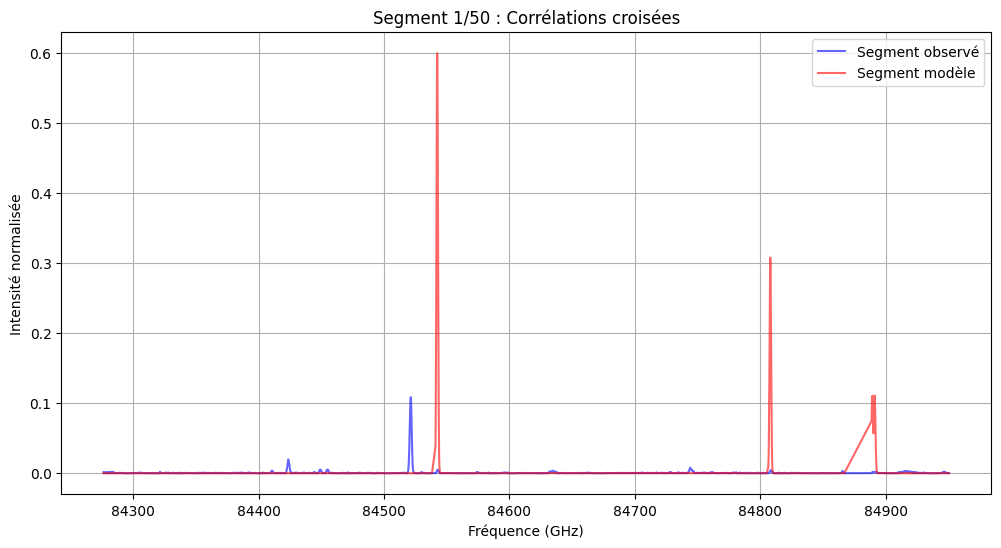

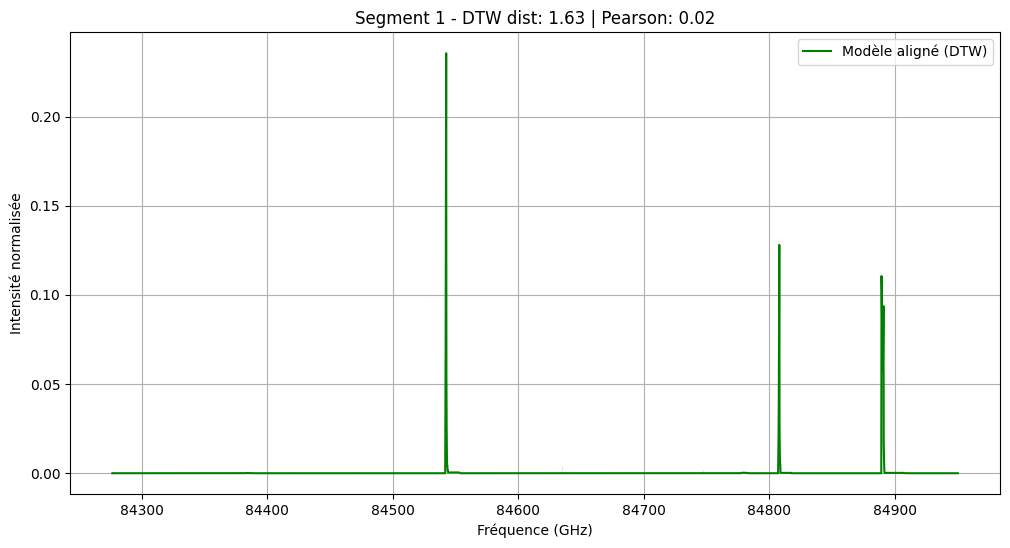

Segment 2/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747)]

Segment 2/50:
Pearson: 0.0142 (p-value: 0.5921)
RMSE: 0.0197, NMAE: 1.9078
Non significatif


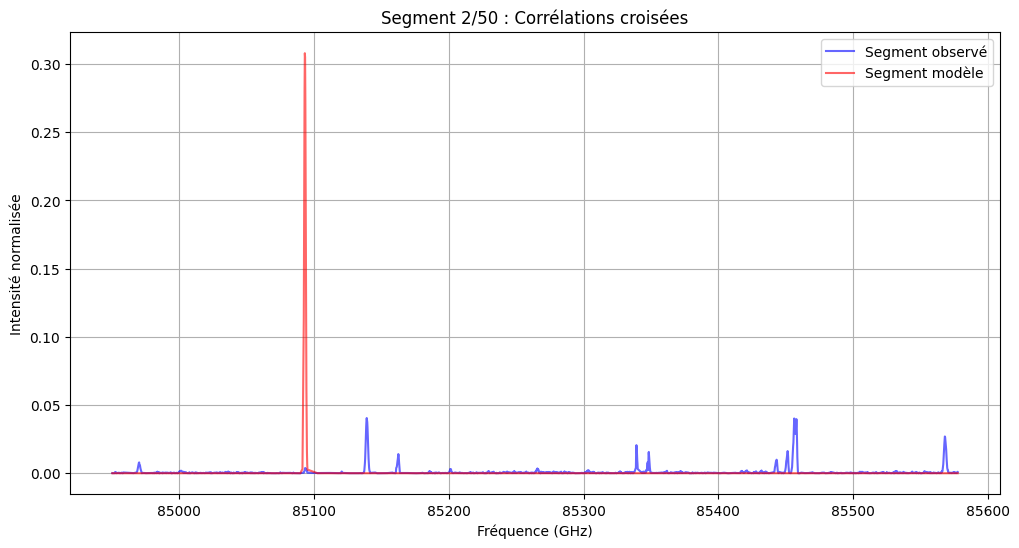

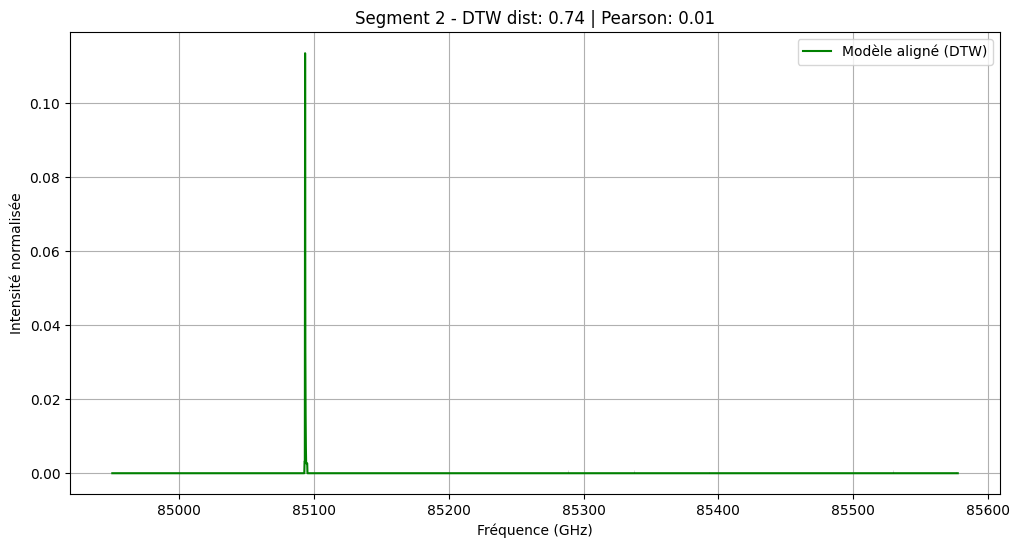

Segment 3/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317)]

Segment 3/50:
Pearson: nan (p-value: nan)
RMSE: 0.0069, NMAE: 1.0000
Non significatif


/tmp/cache-flgrenier/ipykernel_2537127/1862670144.py:93: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson = pearsonr(y_segment_obs, model_interp)[0]
/tmp/cache-flgrenier/ipykernel_2537127/1862670144.py:94: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_pval = pearsonr(y_segment_obs, model_interp)[1]


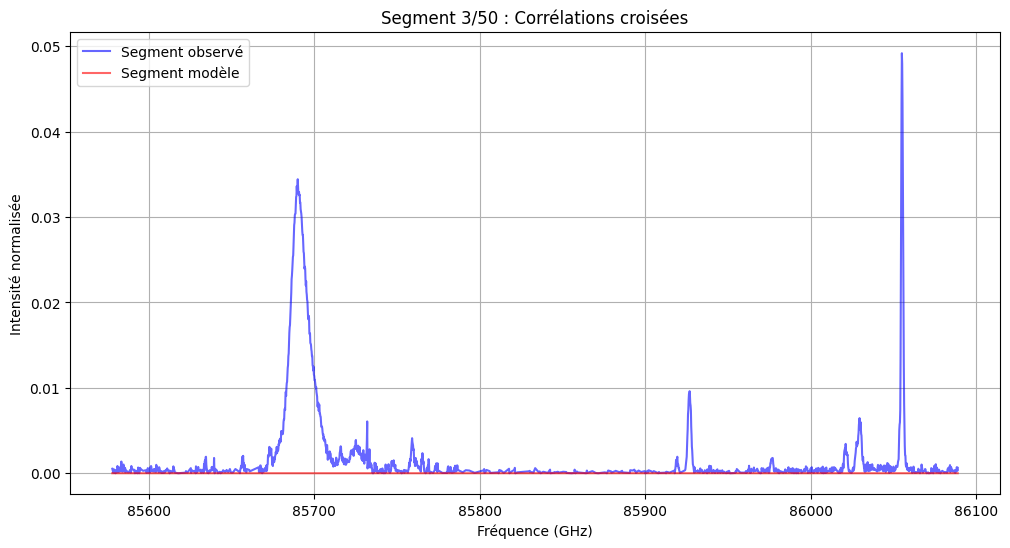

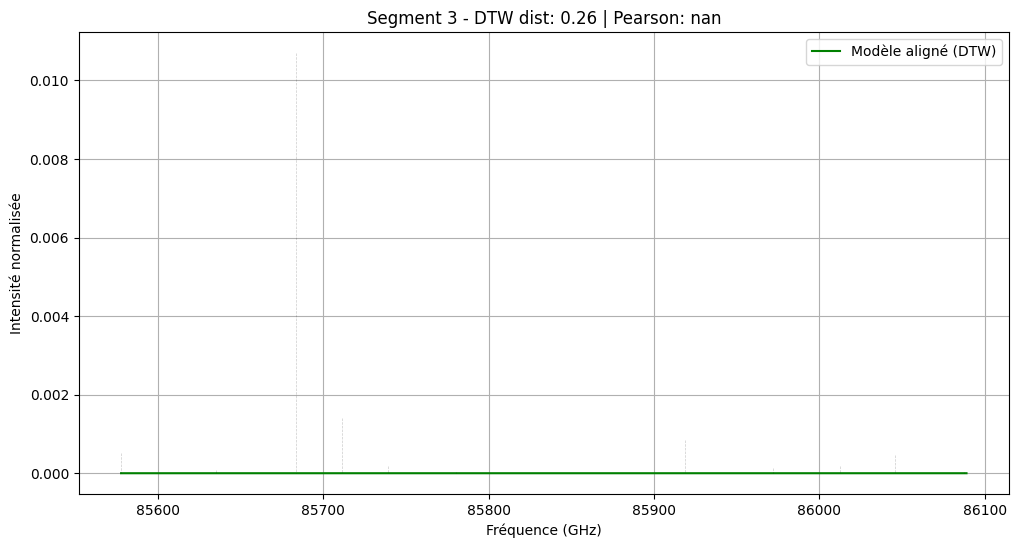

Segment 4/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527)]

Segment 4/50:
Pearson: -0.0105 (p-value: 0.6921)
RMSE: 0.0139, NMAE: 1.0078
Non significatif


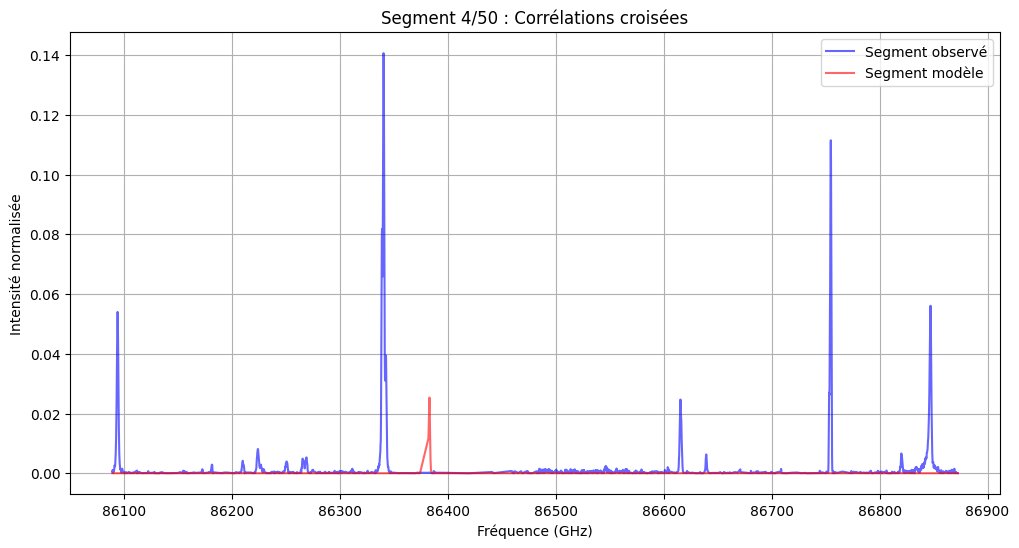

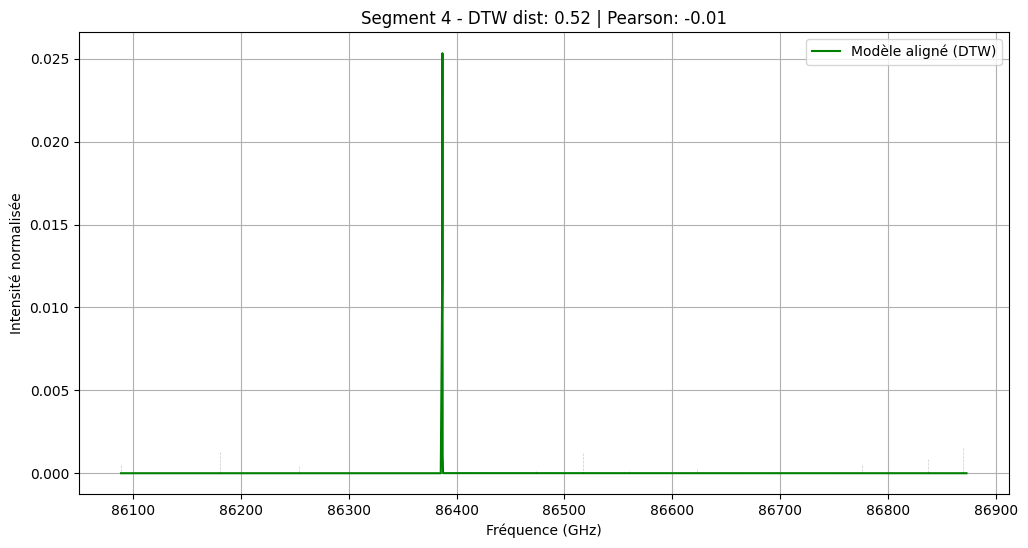

Segment 5/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136)]

Segment 5/50:
Pearson: -0.0129 (p-value: 0.6259)
RMSE: 0.0090, NMAE: 1.0000
Non significatif


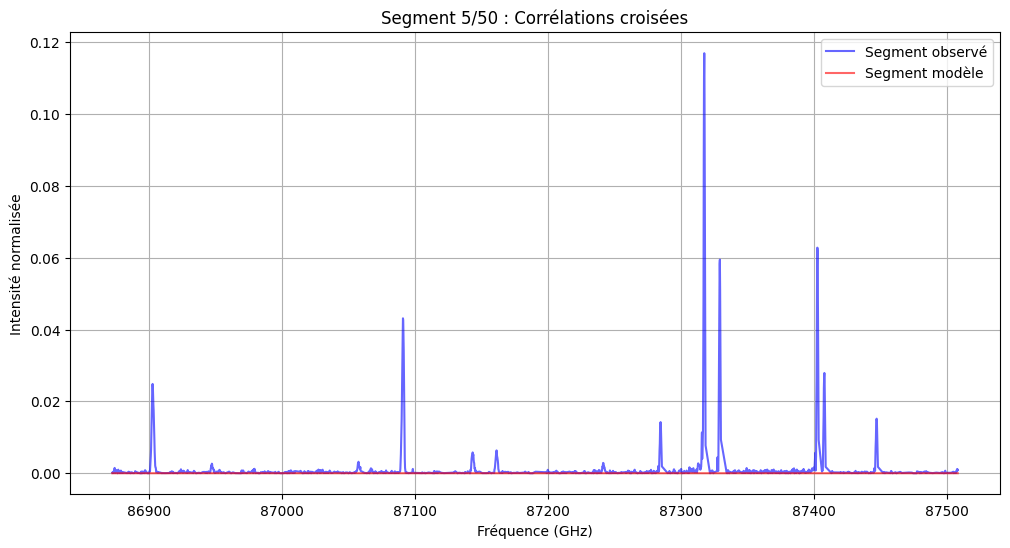

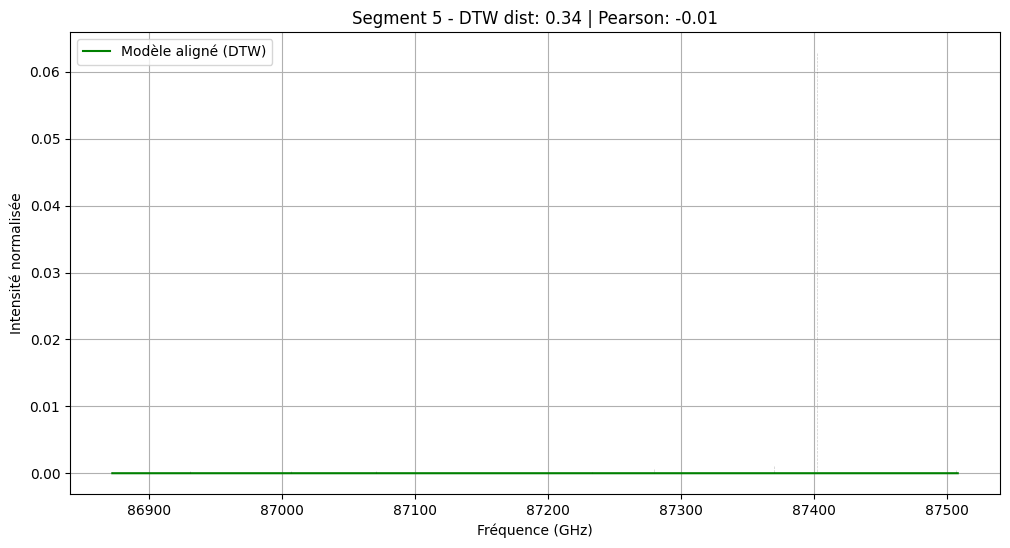

Segment 6/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268)]

Segment 6/50:
Pearson: 0.1373 (p-value: 0.0000)
RMSE: 0.0345, NMAE: 5.0456
Significatif


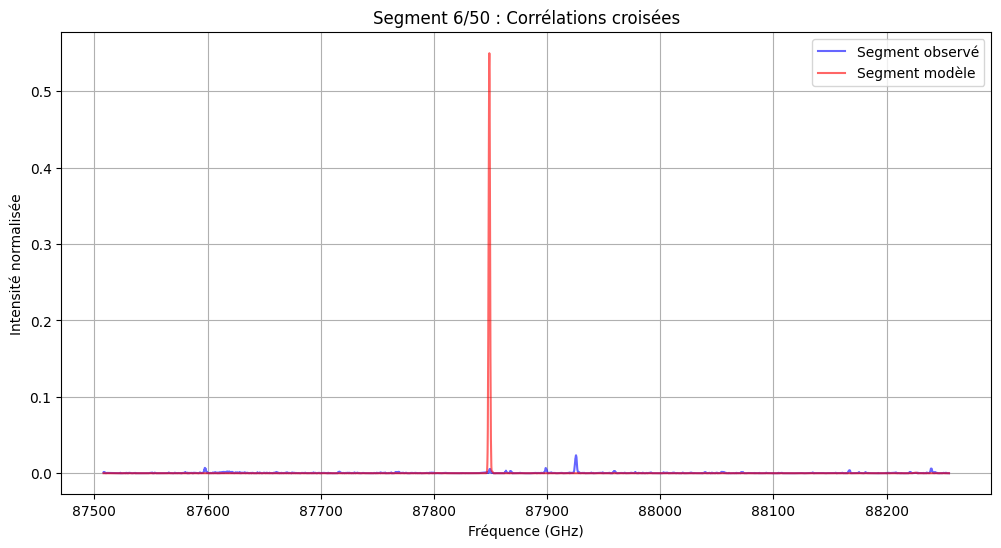

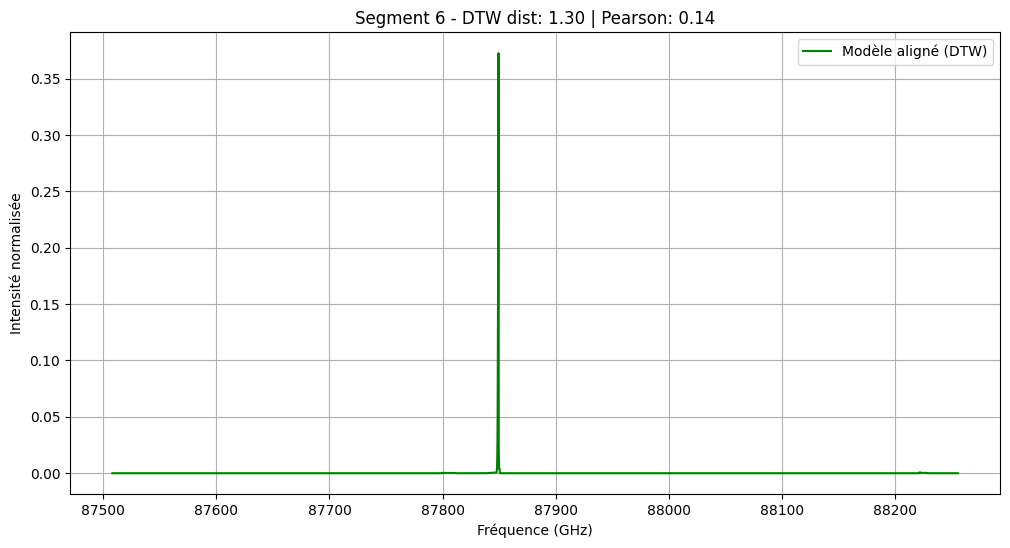

Segment 7/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773)]

Segment 7/50:
Pearson: nan (p-value: nan)
RMSE: 0.0159, NMAE: 1.0000
Non significatif


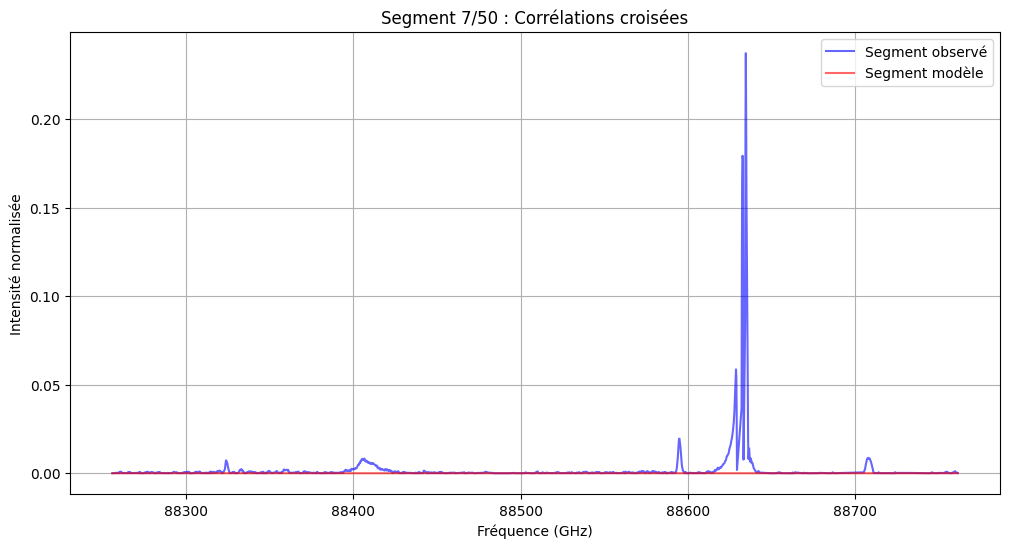

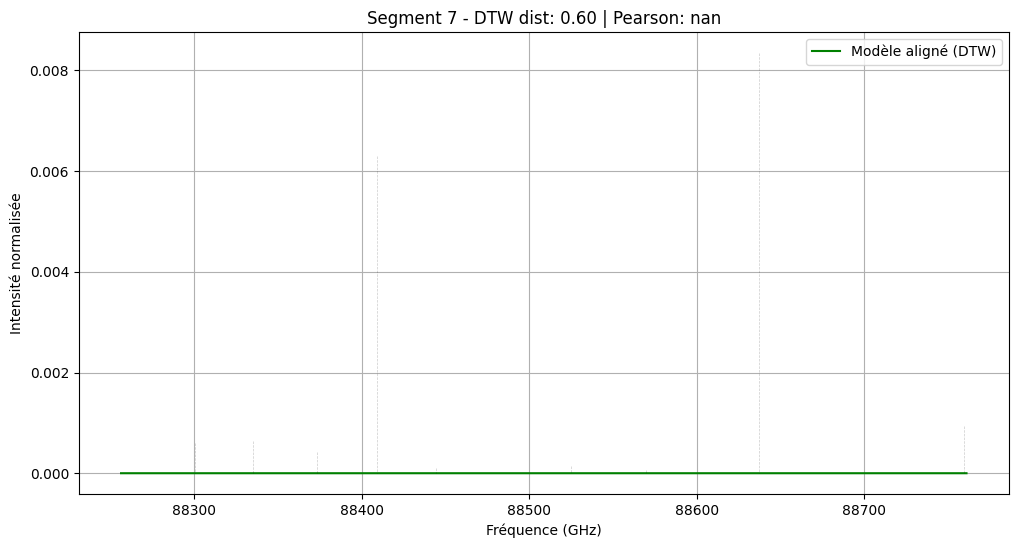

Segment 8/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017)]

Segment 8/50:
Pearson: -0.0067 (p-value: 0.8009)
RMSE: 0.0212, NMAE: 1.0000
Non significatif


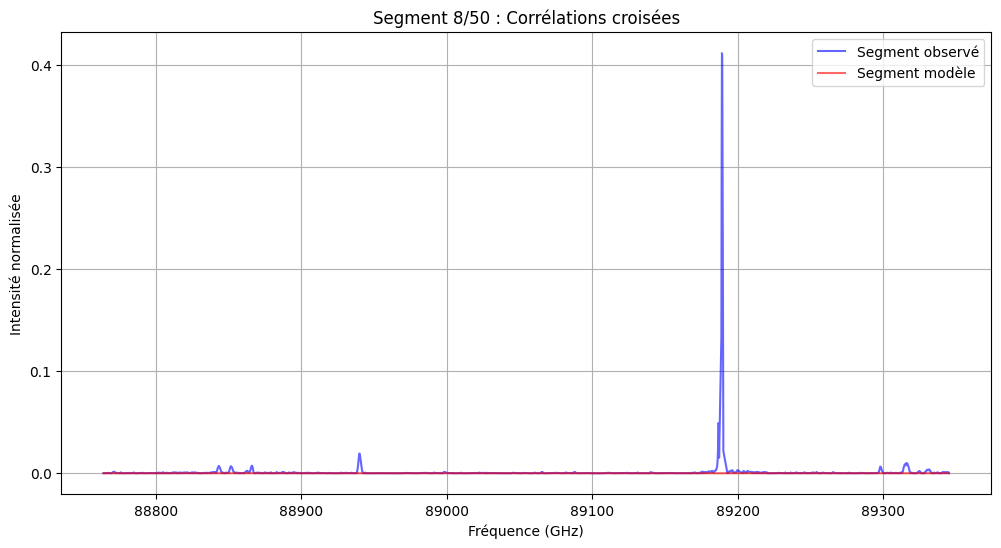

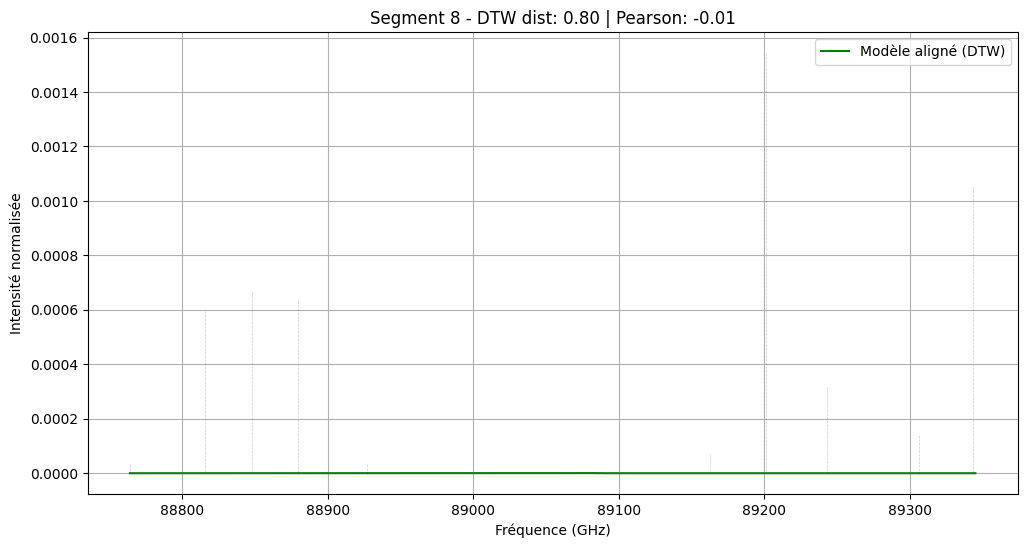

Segment 9/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942)]

Segment 9/50:
Pearson: nan (p-value: nan)
RMSE: 0.0022, NMAE: 1.0000
Non significatif


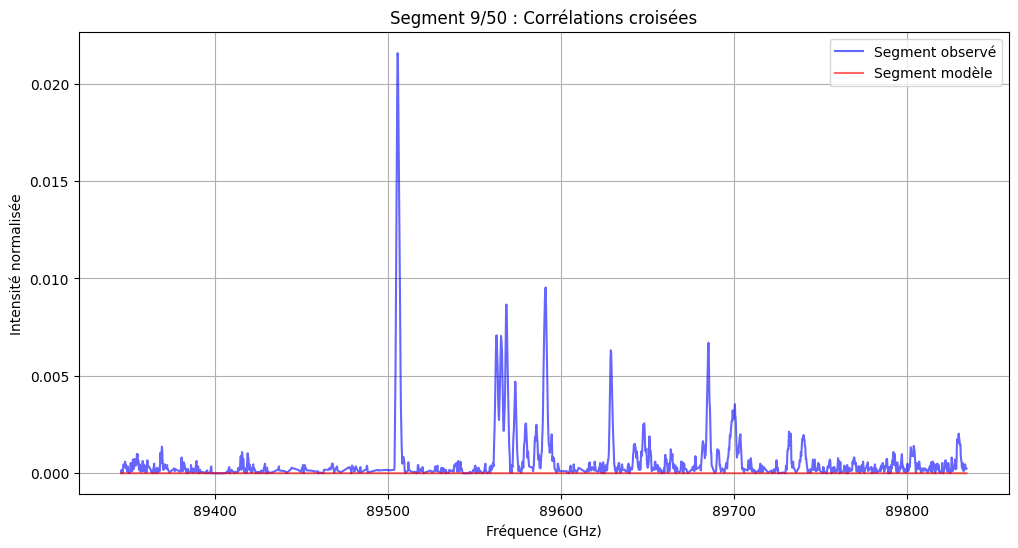

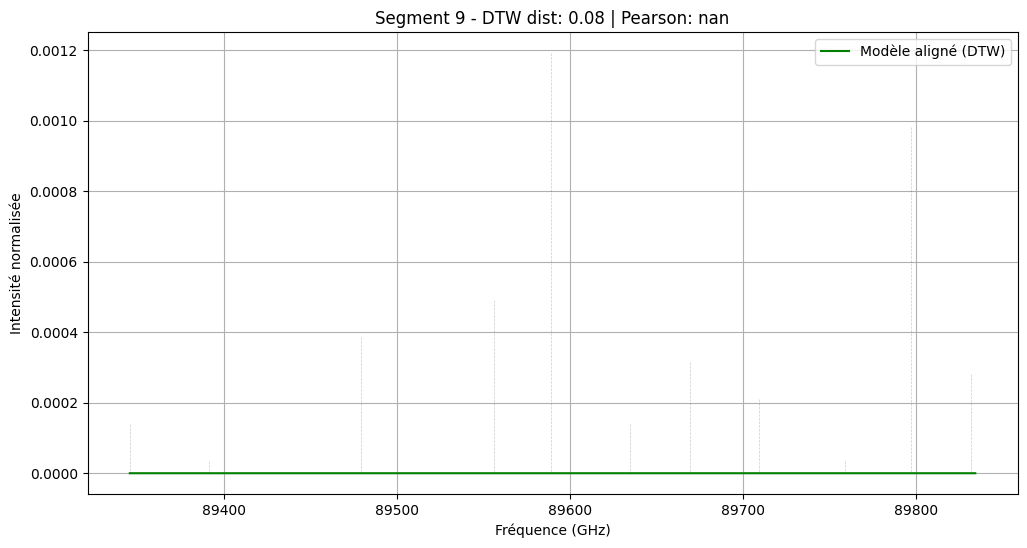

Segment 10/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375)]

Segment 10/50:
Pearson: nan (p-value: nan)
RMSE: 0.0014, NMAE: 1.0000
Non significatif


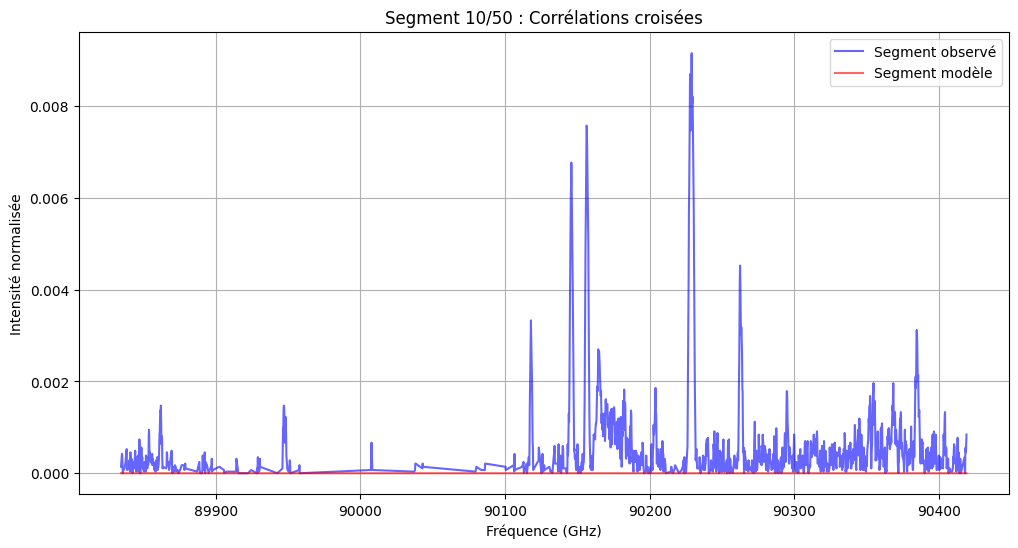

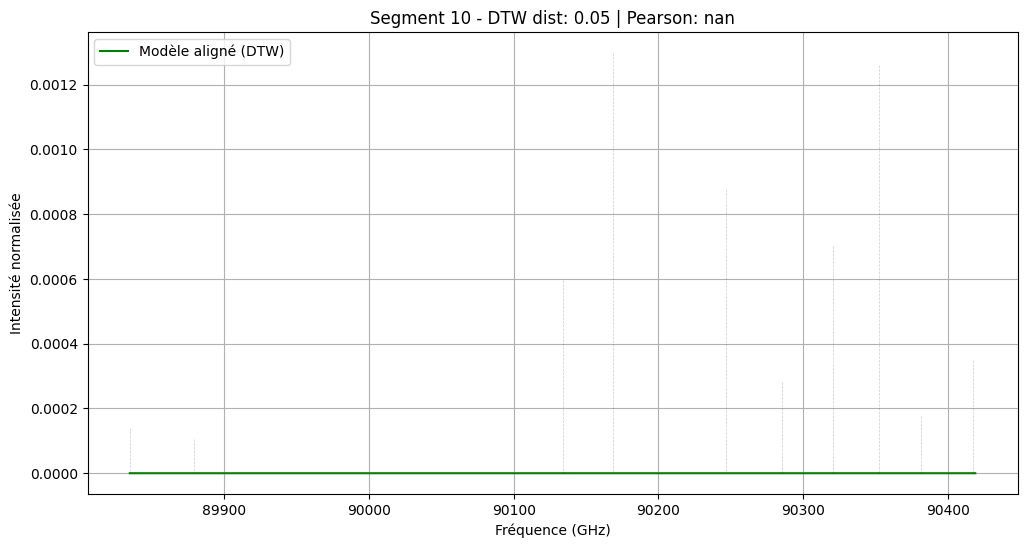

Segment 11/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127)]

Segment 11/50:
Pearson: nan (p-value: nan)
RMSE: 0.0271, NMAE: 1.0000
Non significatif


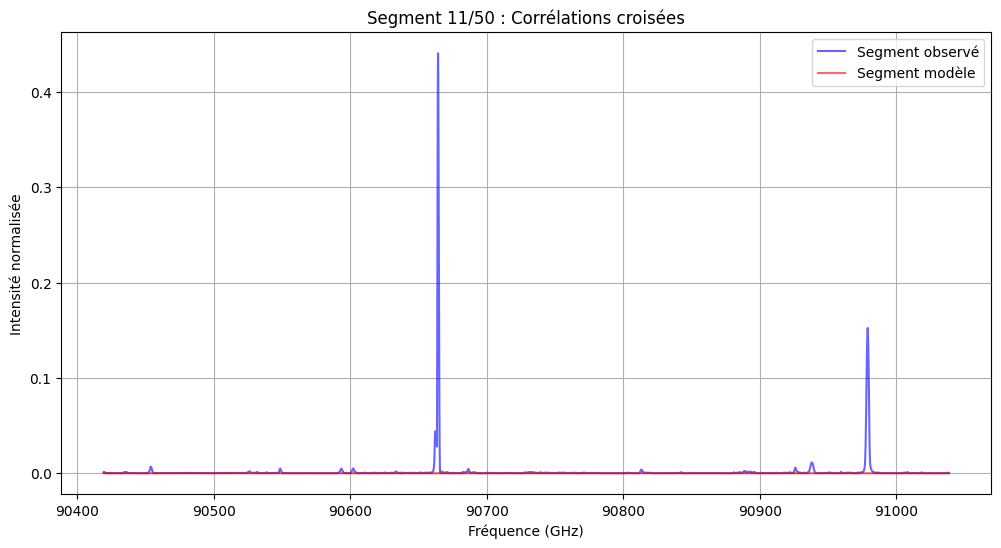

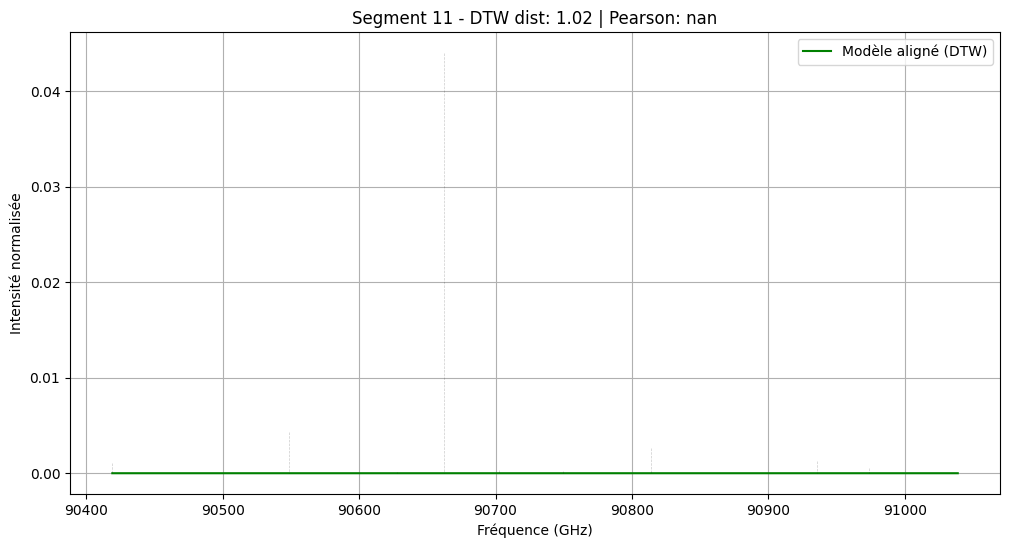

Segment 12/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974)]

Segment 12/50:
Pearson: -0.0232 (p-value: 0.3801)
RMSE: 0.0012, NMAE: 0.9999
Non significatif


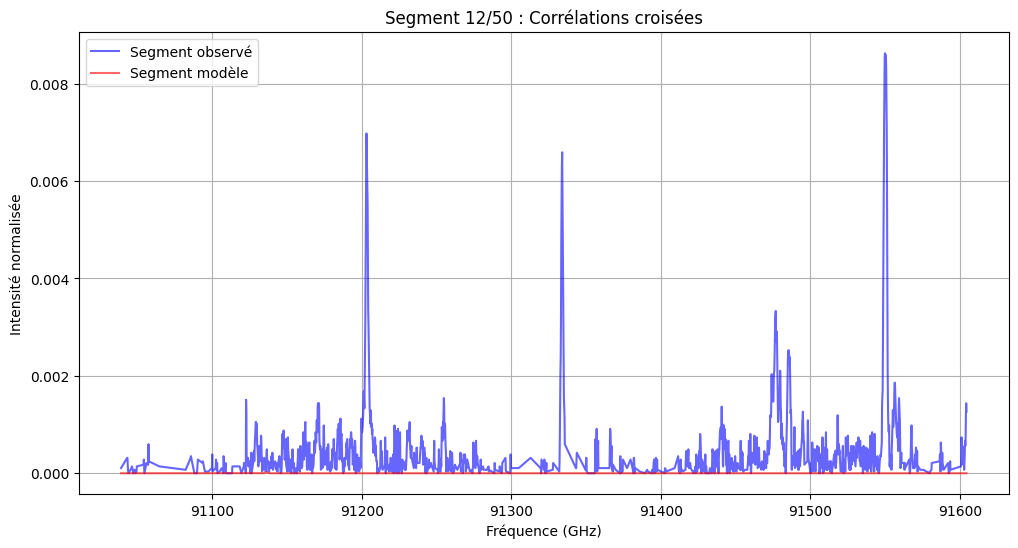

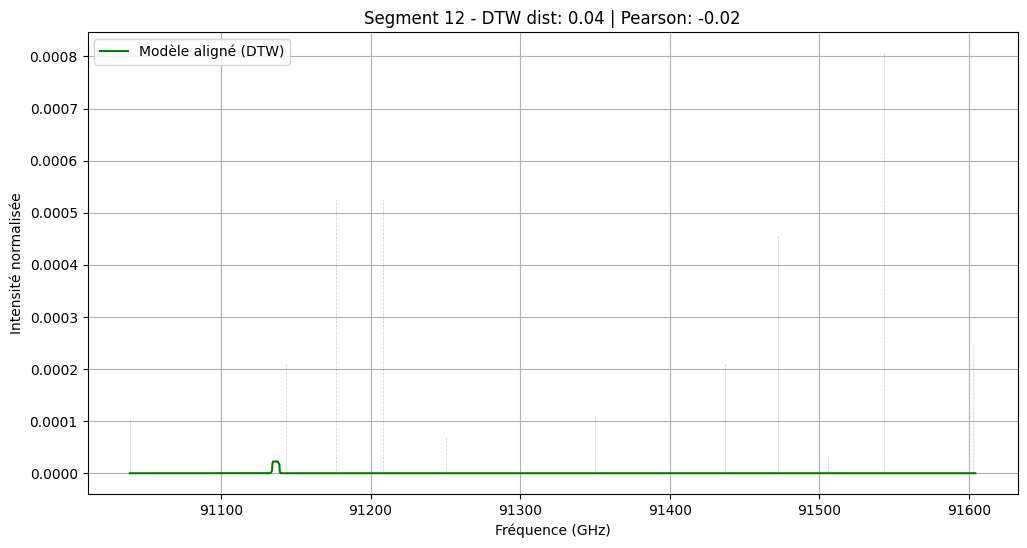

Segment 13/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457)]

Segment 13/50:
Pearson: nan (p-value: nan)
RMSE: 0.0106, NMAE: 1.0000
Non significatif


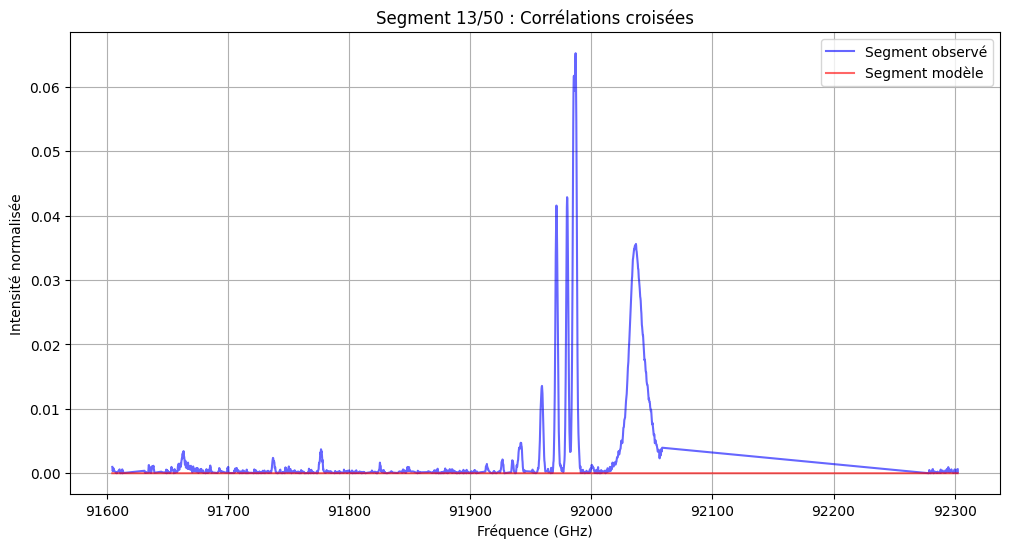

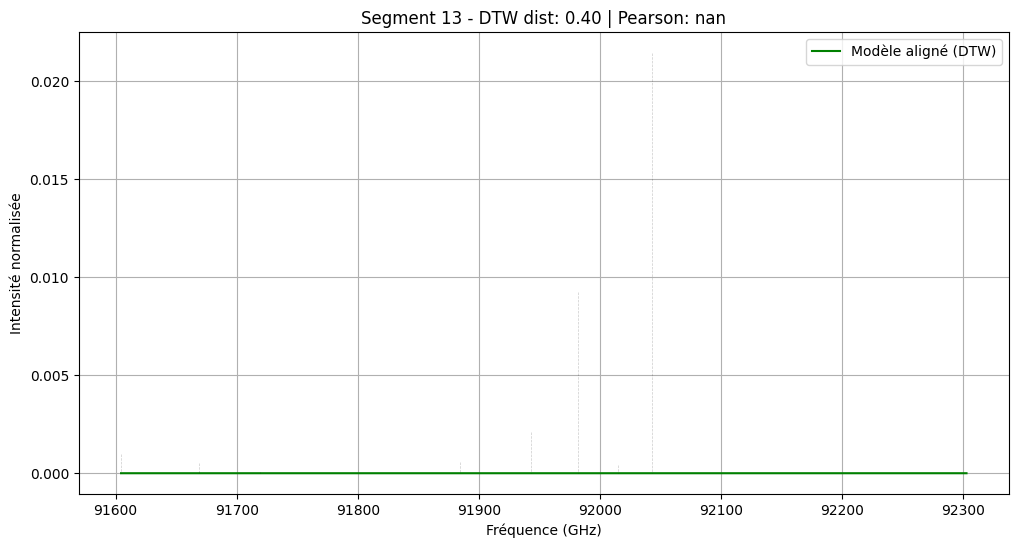

Segment 14/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731)]

Segment 14/50:
Pearson: -0.0109 (p-value: 0.6809)
RMSE: 0.0058, NM

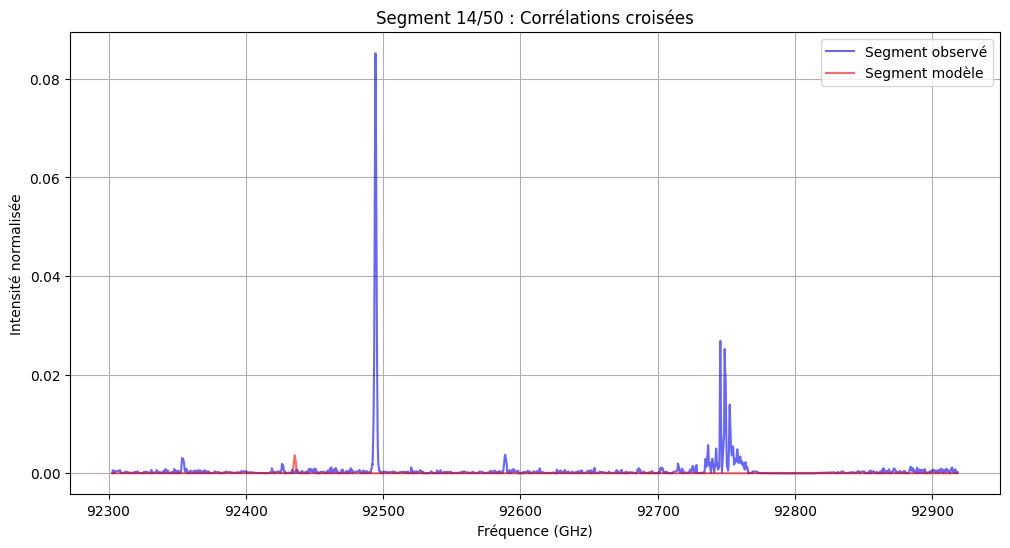

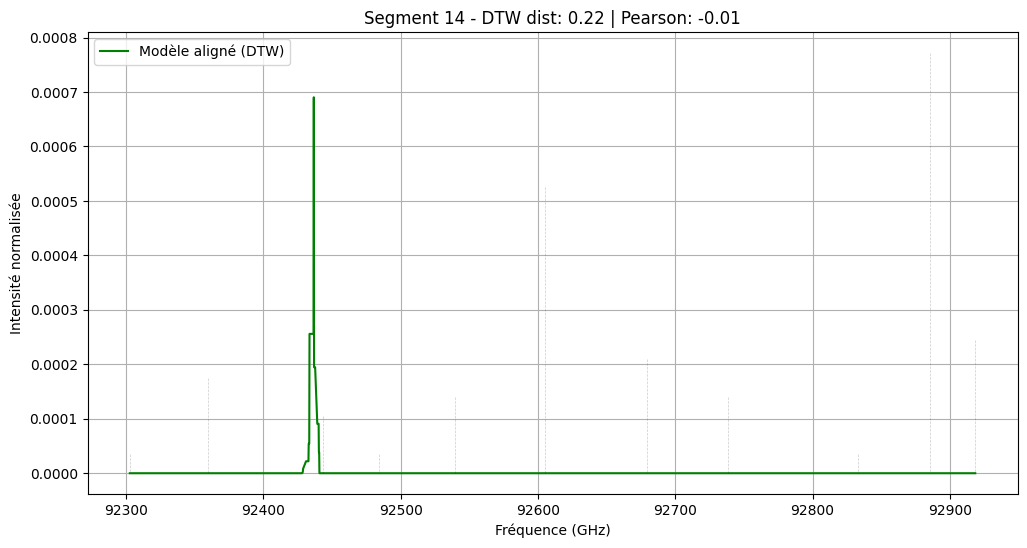

Segment 15/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682)]

Se

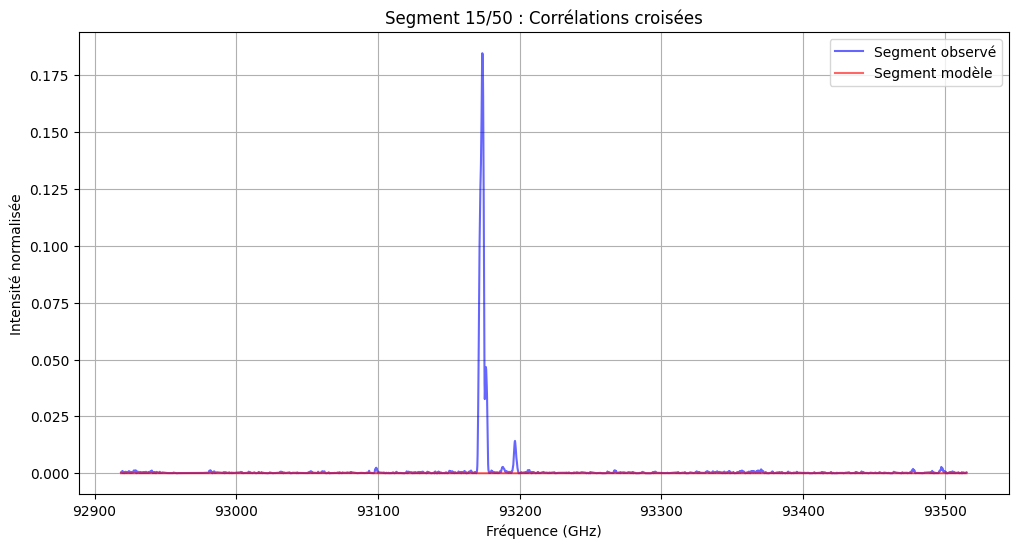

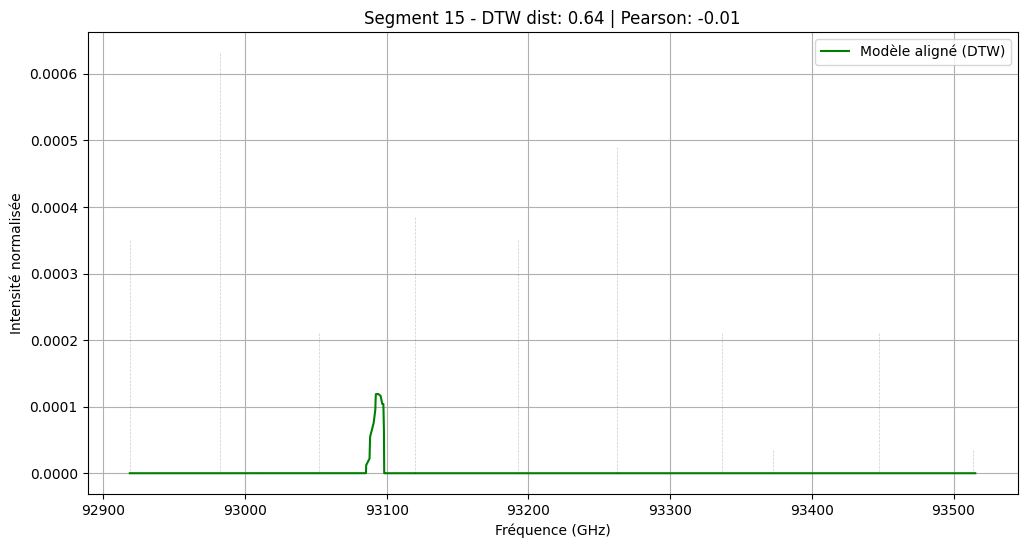

Segment 16/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

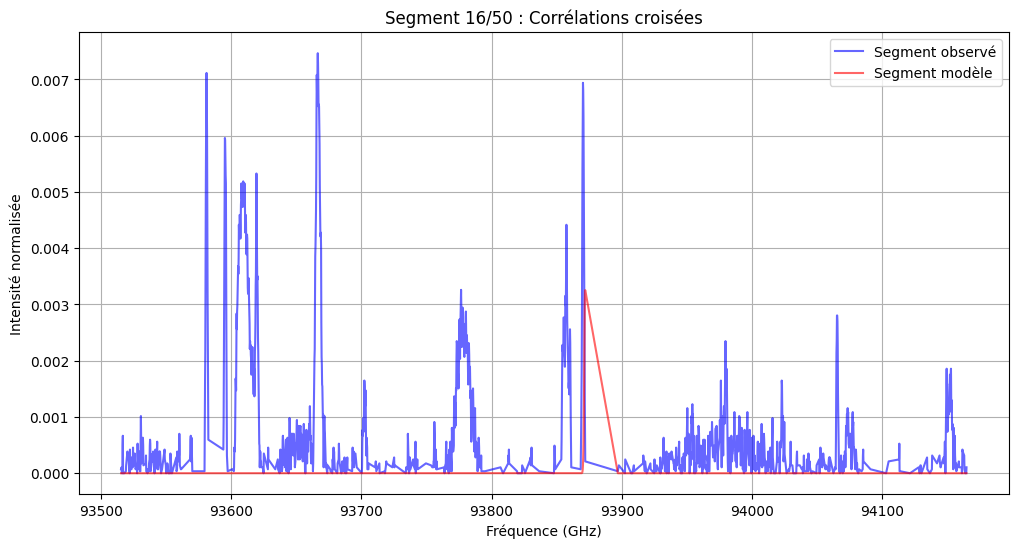

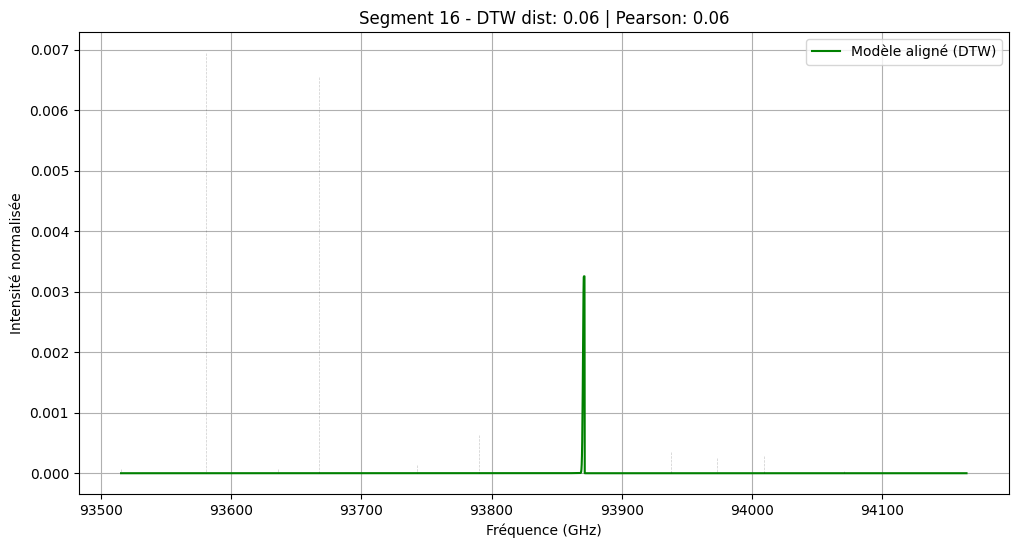

Segment 17/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

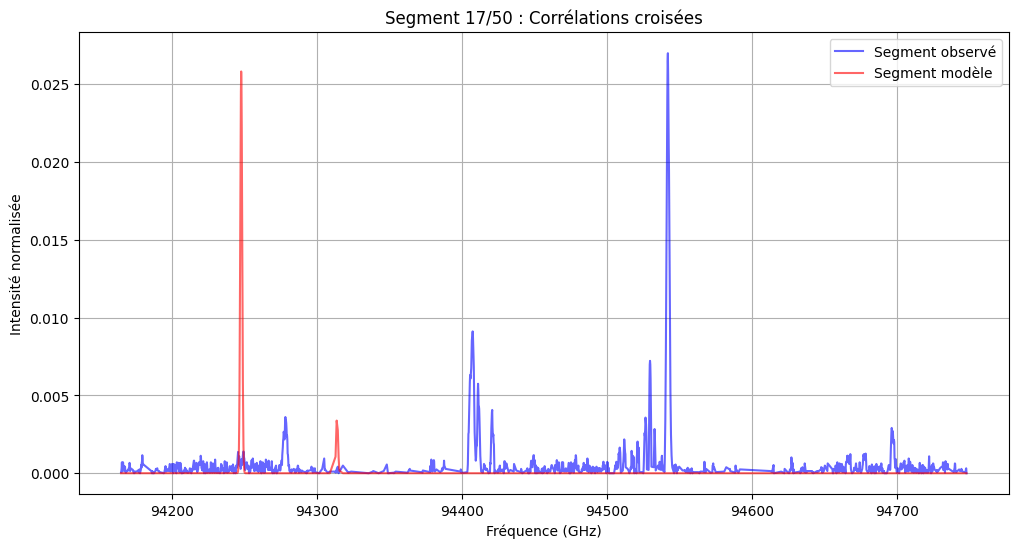

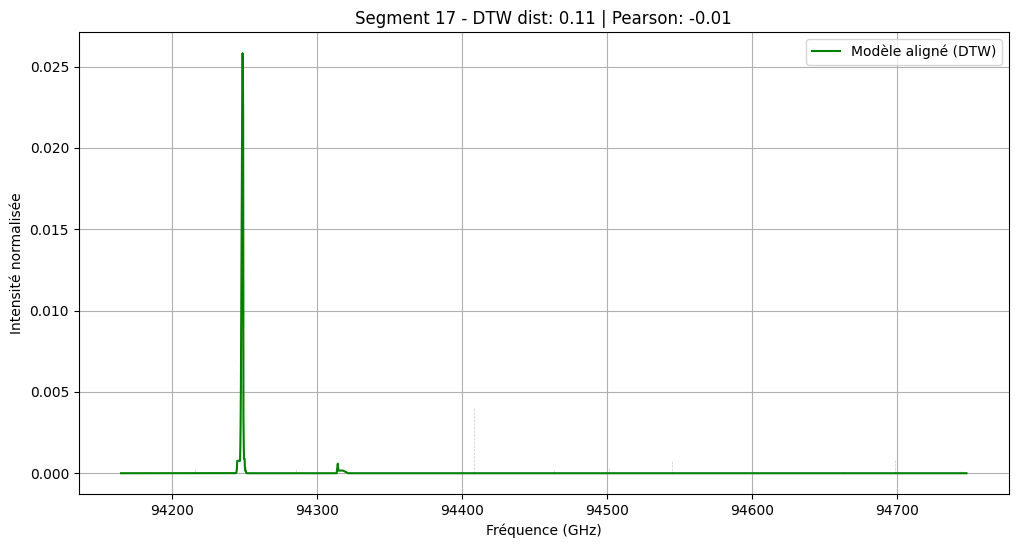

Segment 18/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

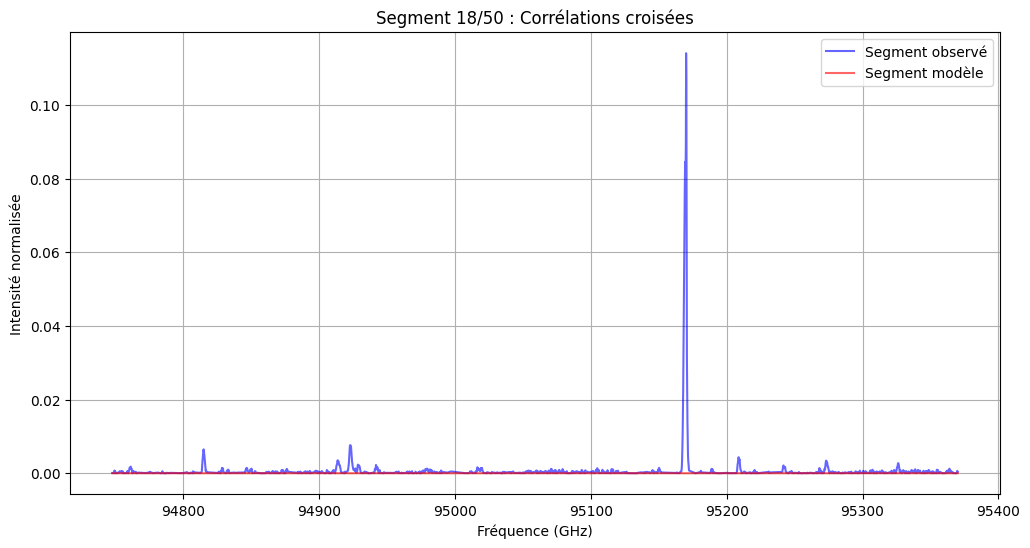

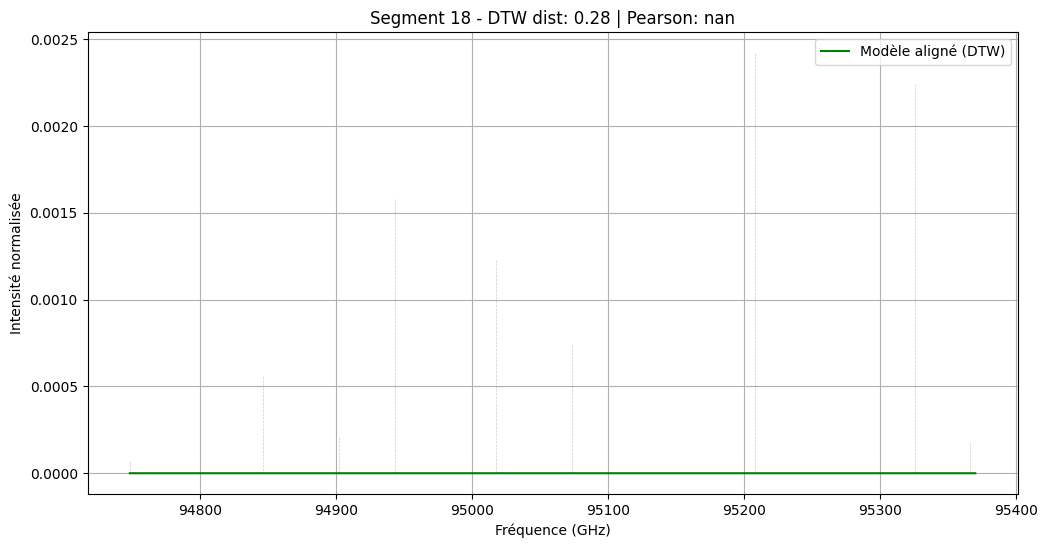

Segment 19/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

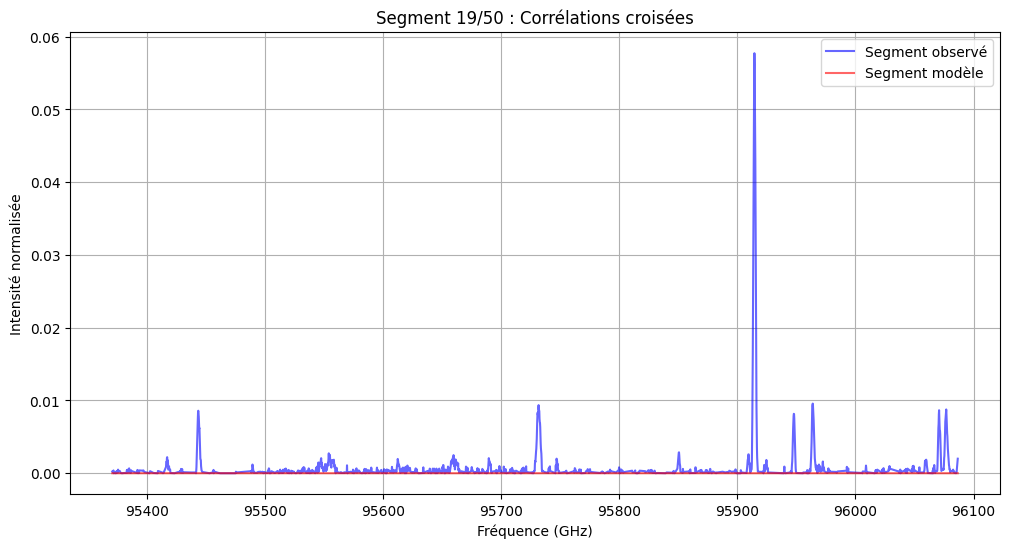

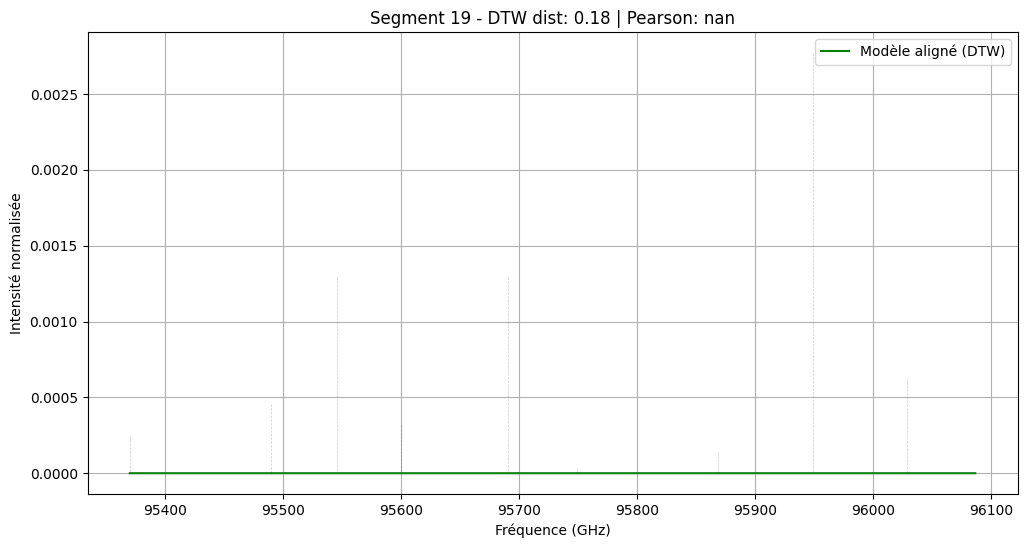

Segment 20/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

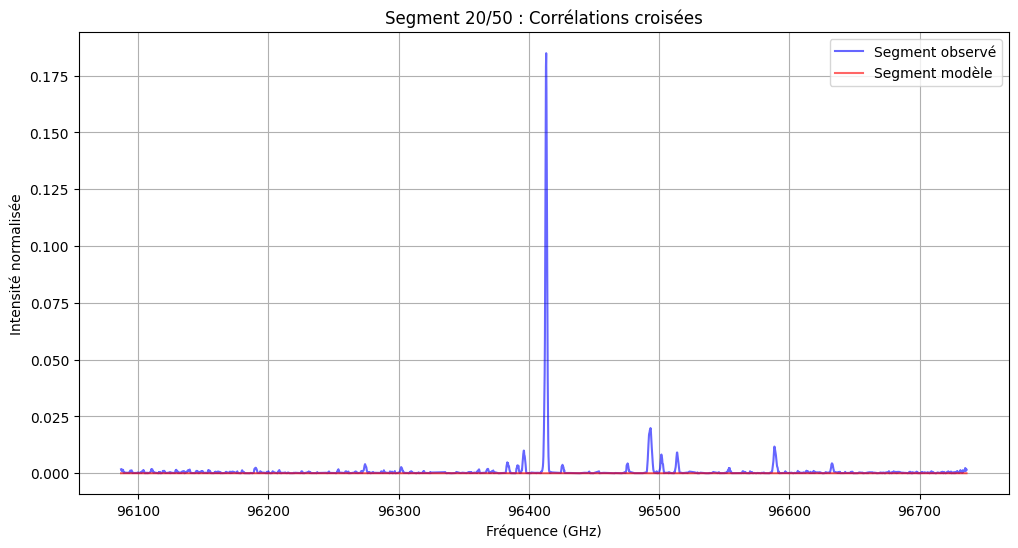

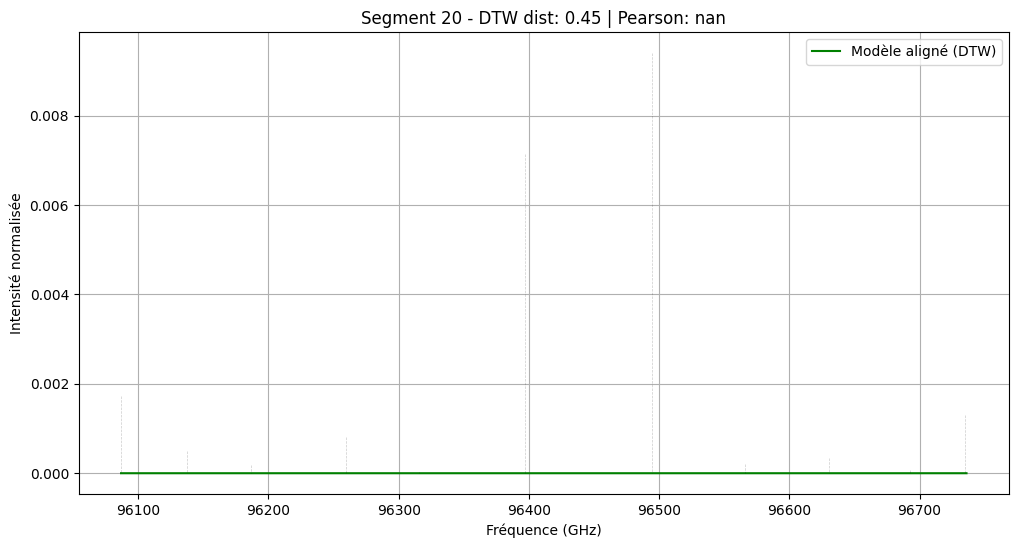

Segment 21/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

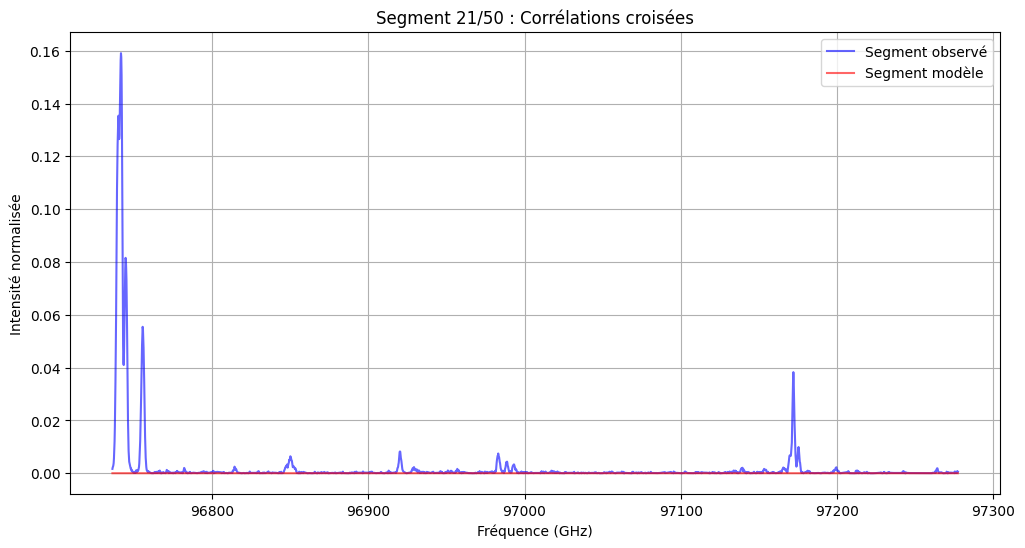

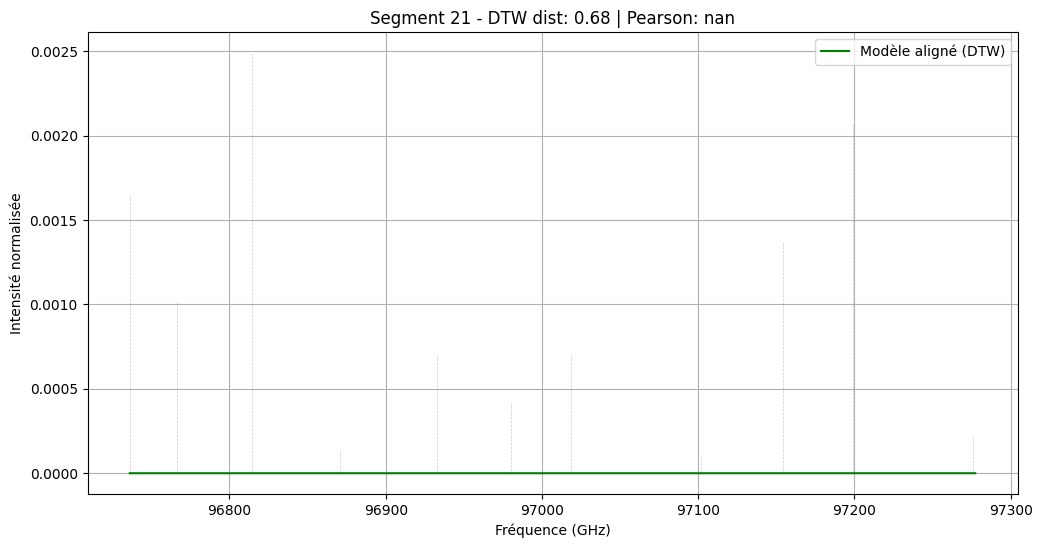

Segment 22/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

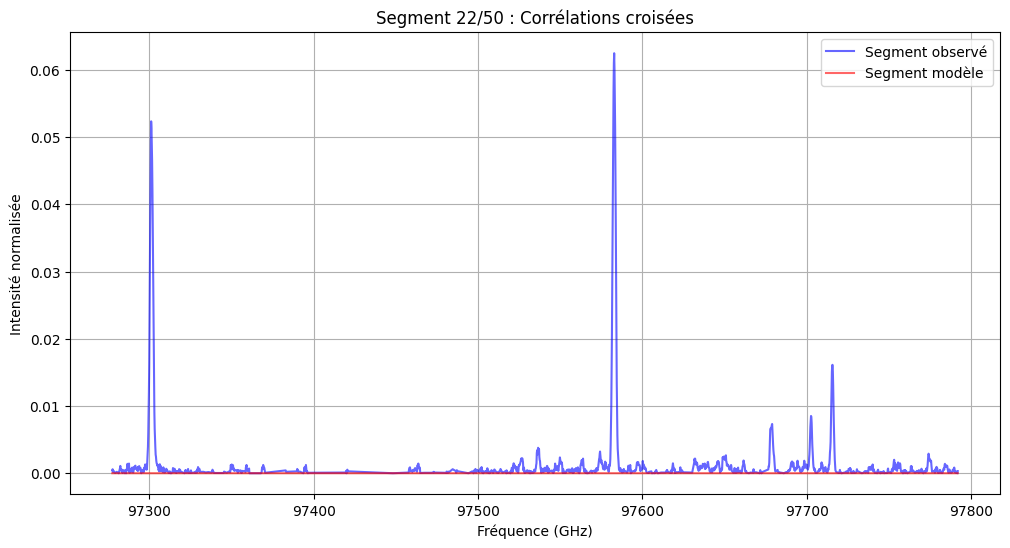

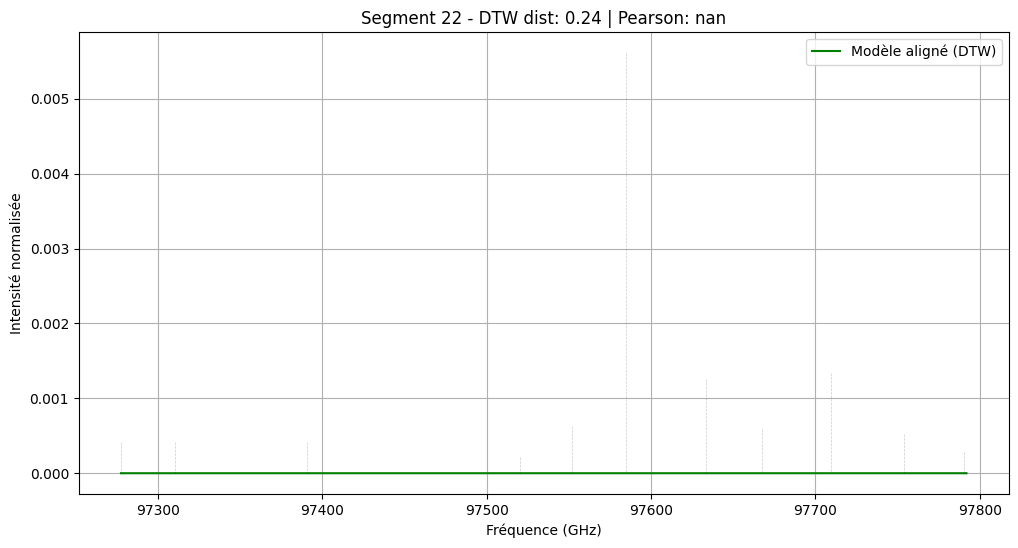

Segment 23/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

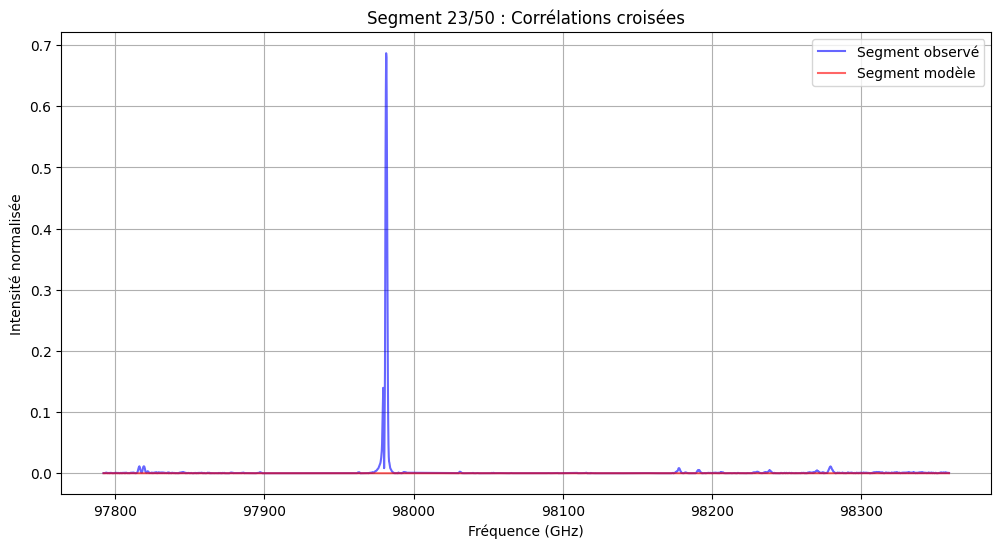

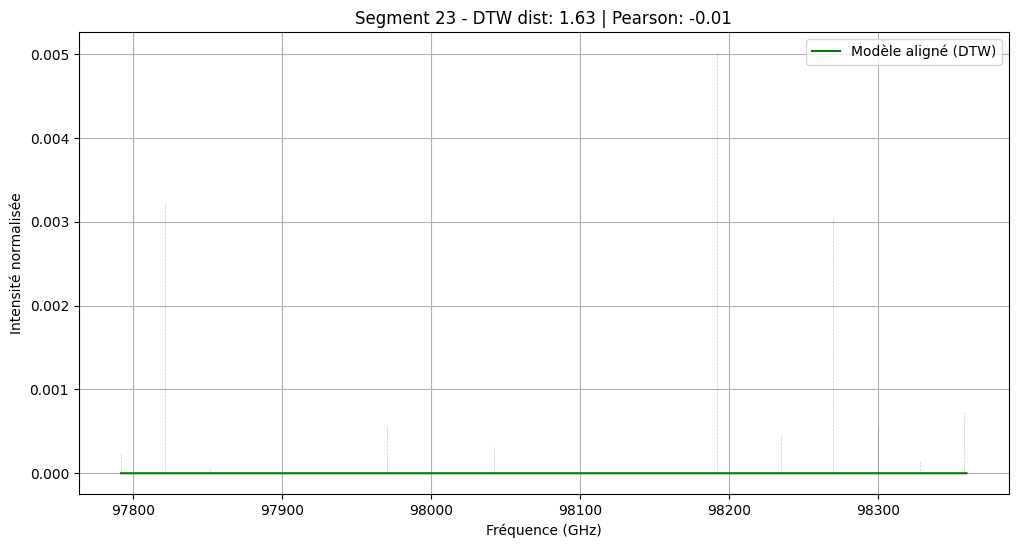

Segment 24/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

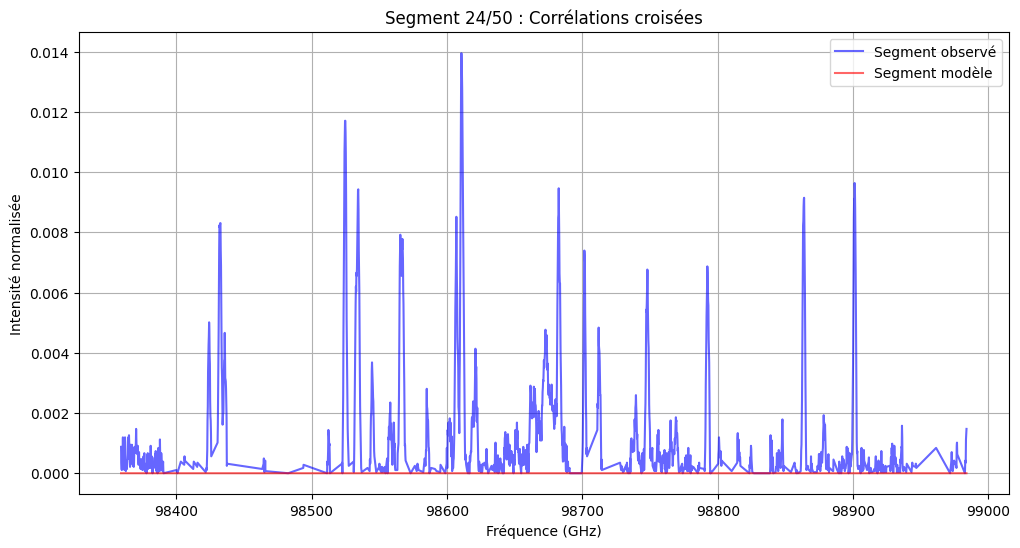

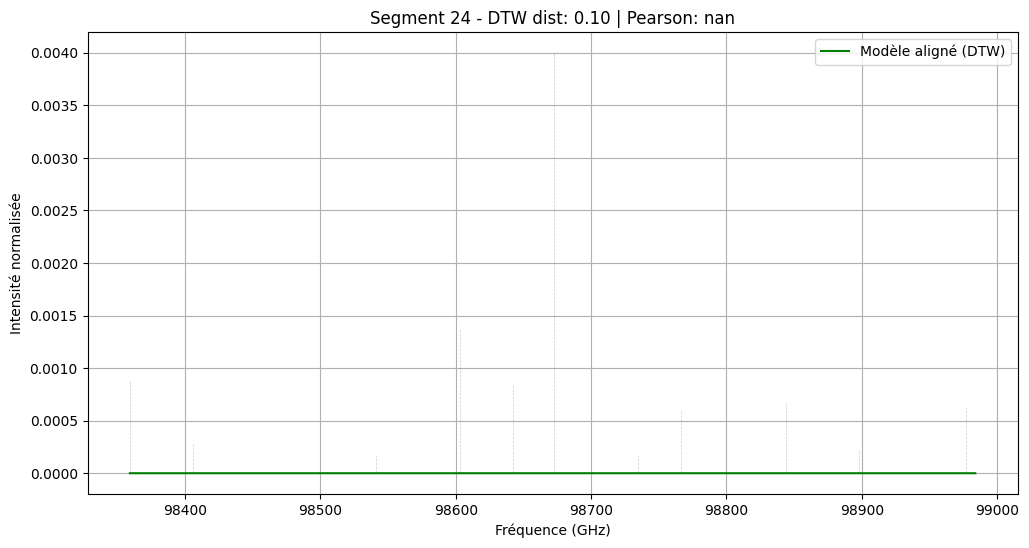

Segment 25/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

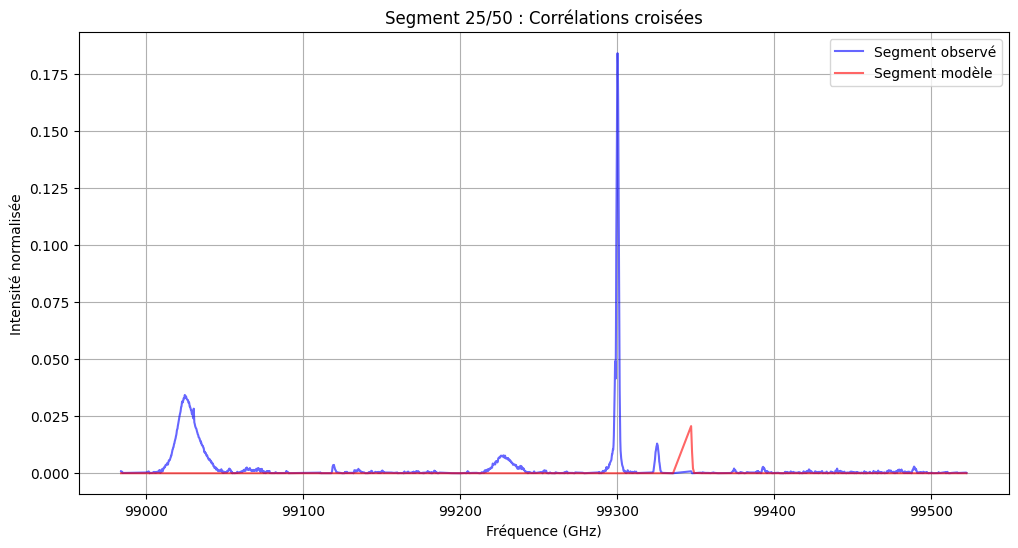

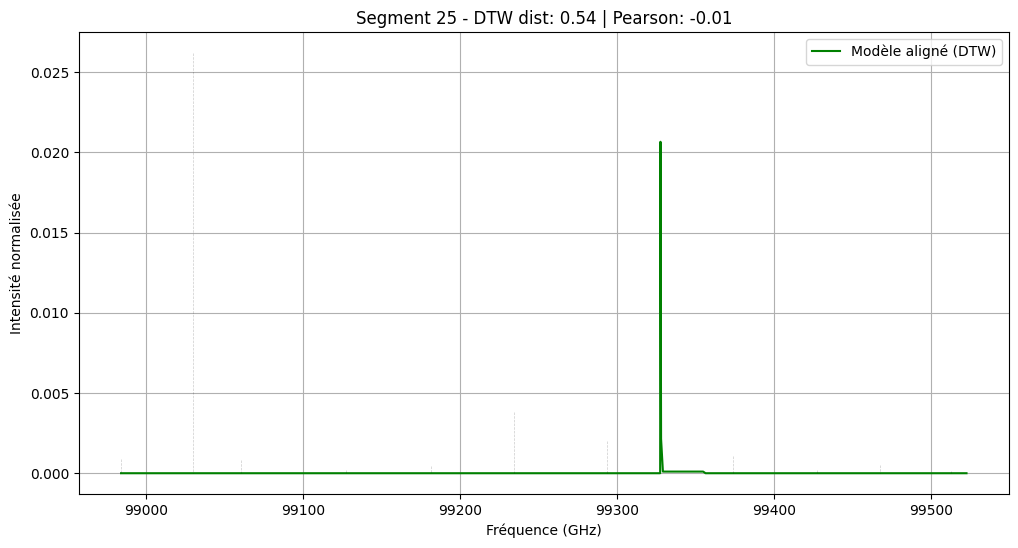

Segment 26/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

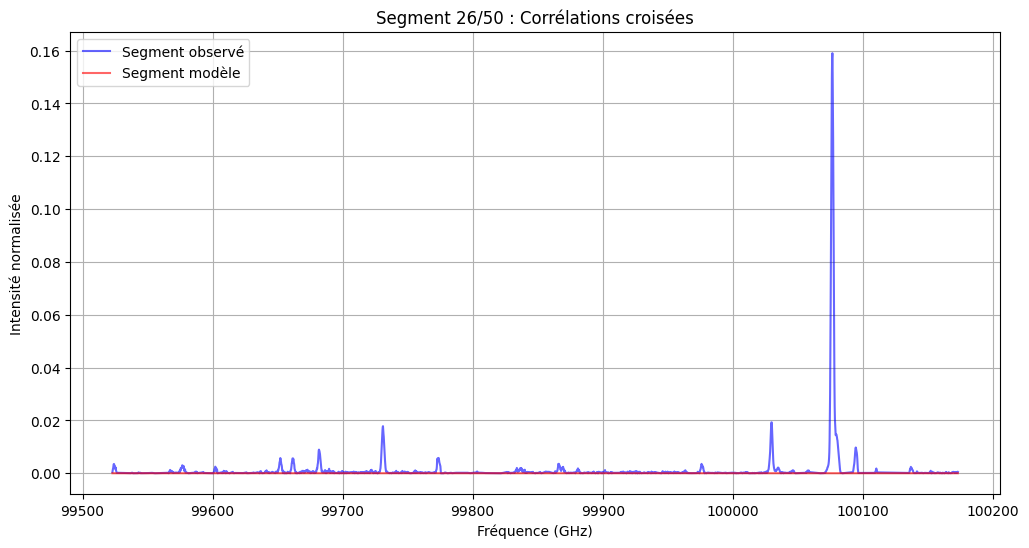

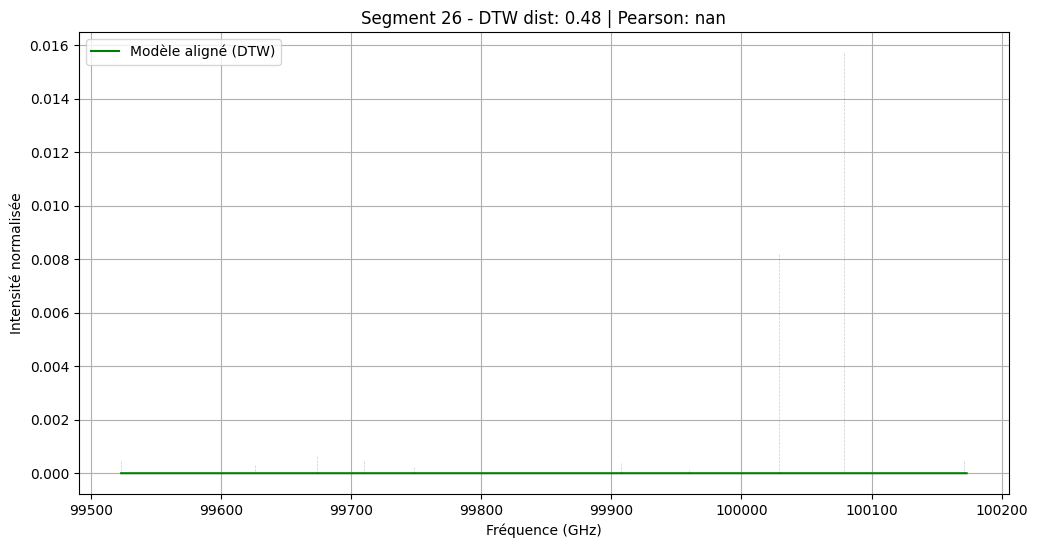

Segment 27/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

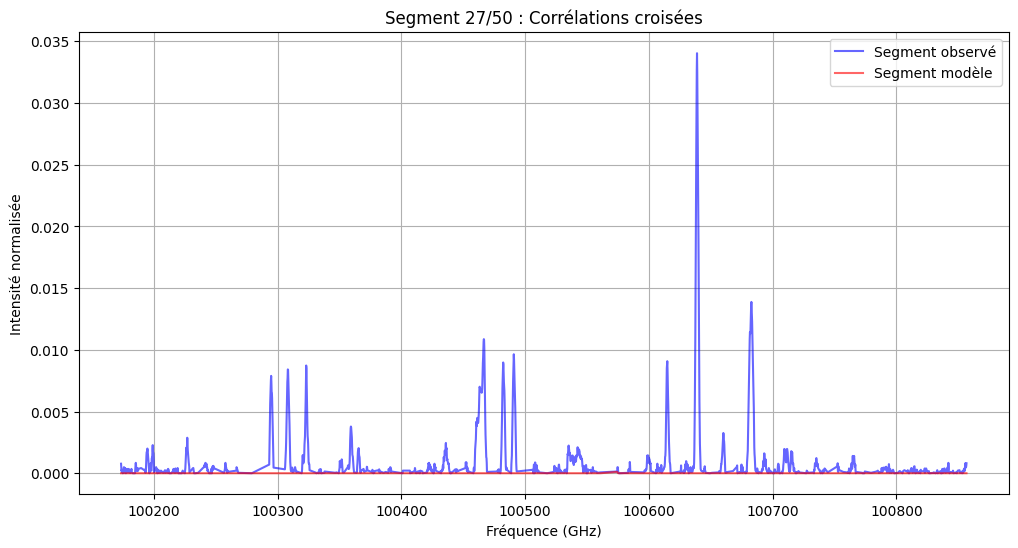

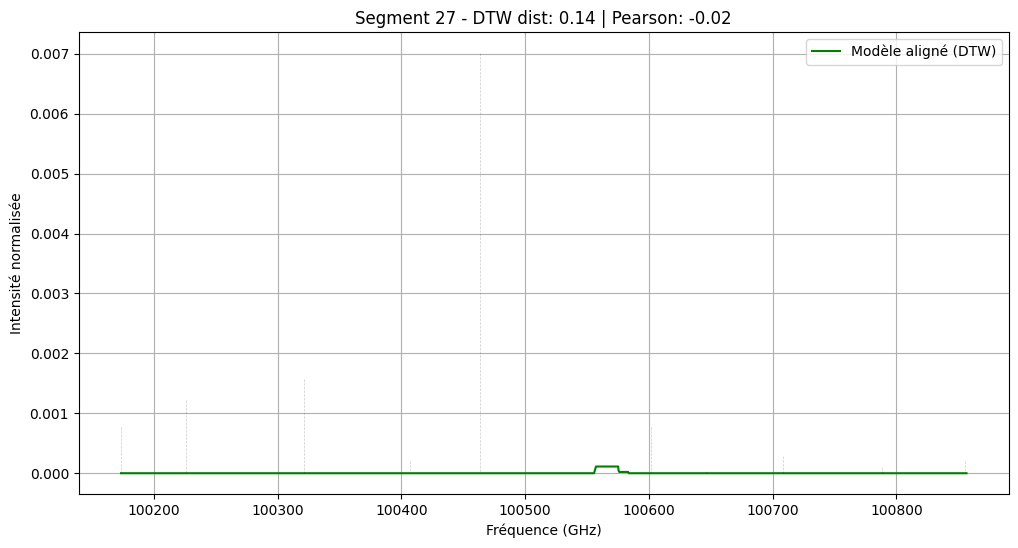

Segment 28/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

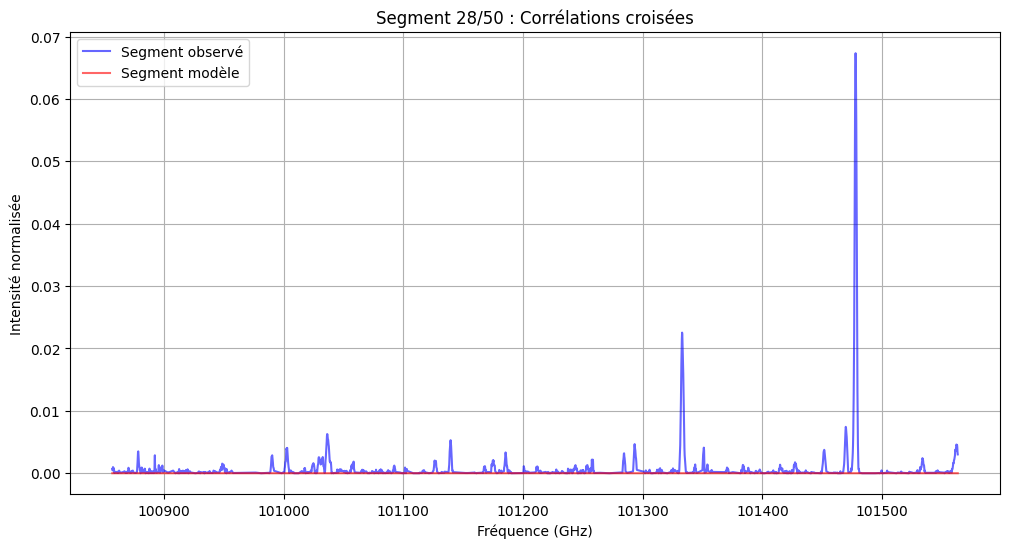

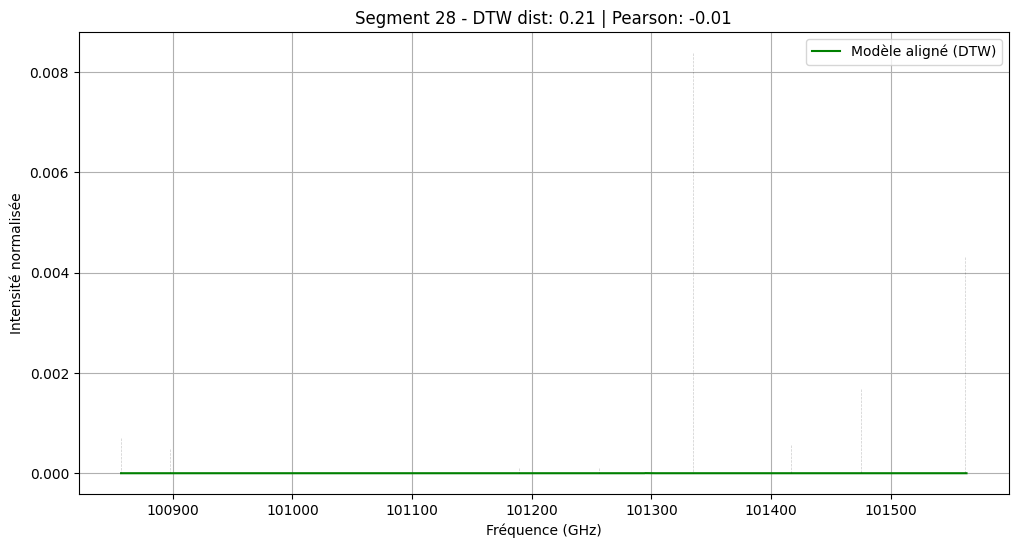

Segment 29/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

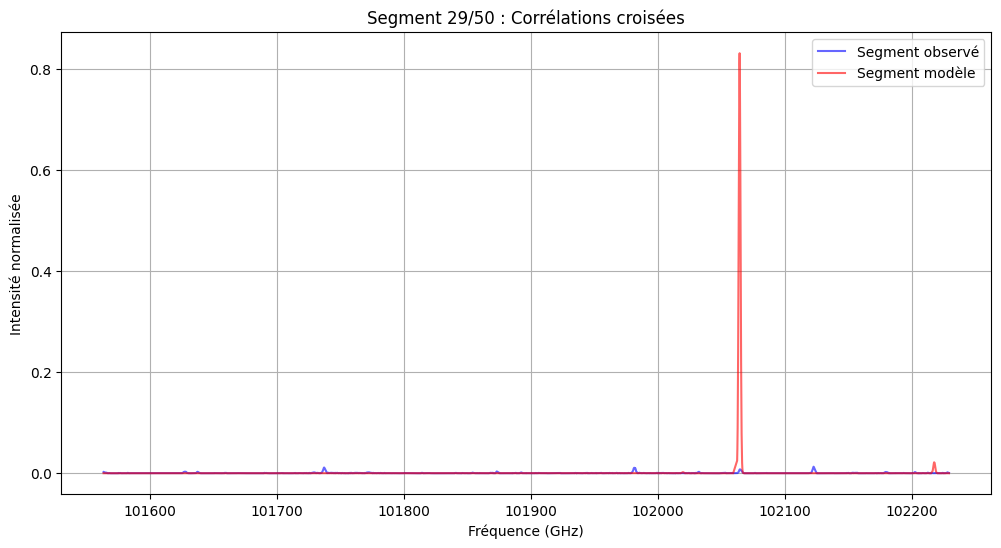

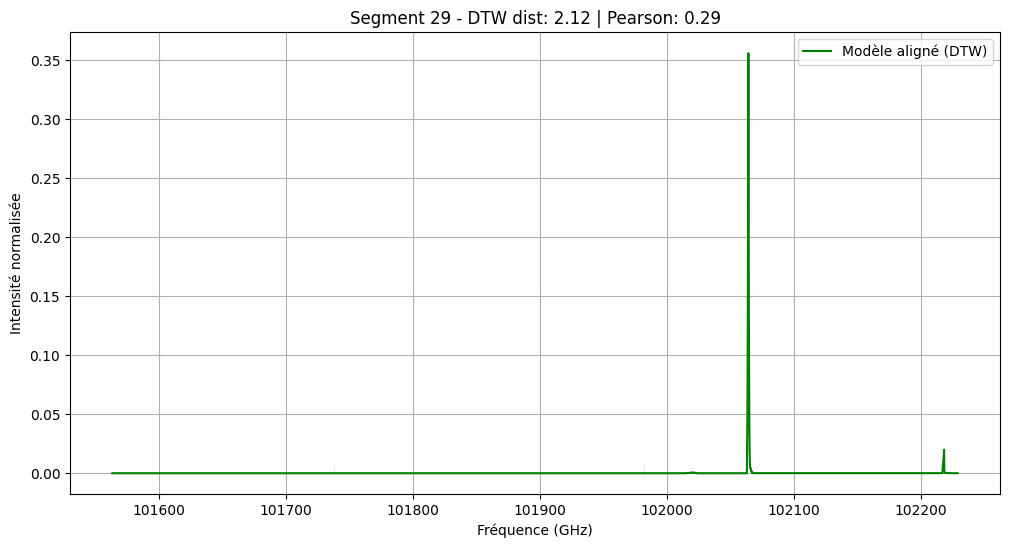

Segment 30/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

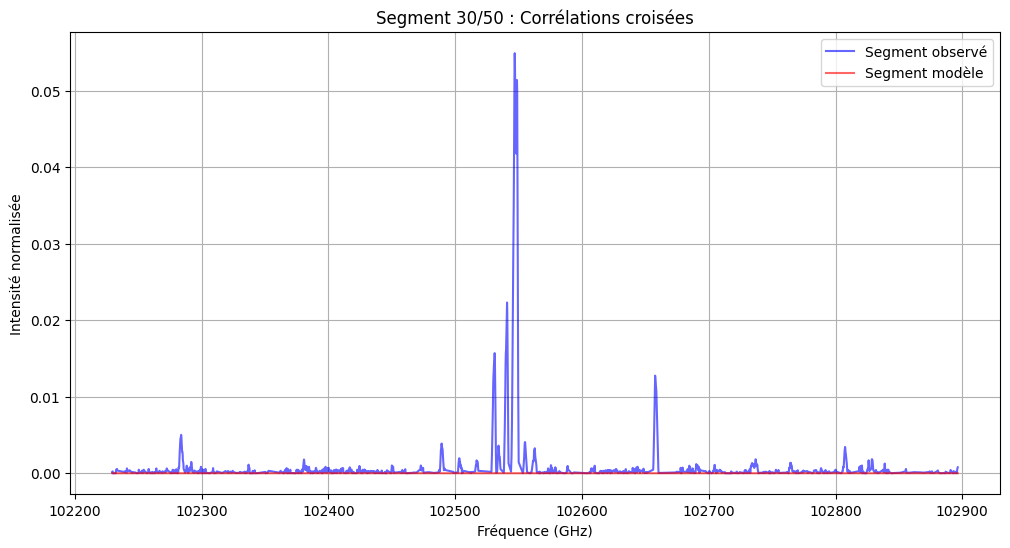

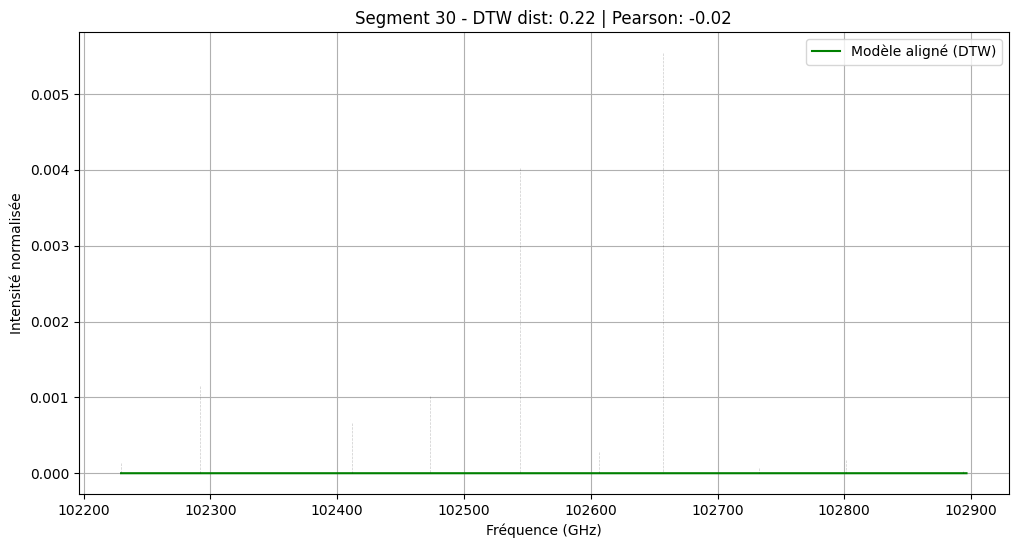

Segment 31/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

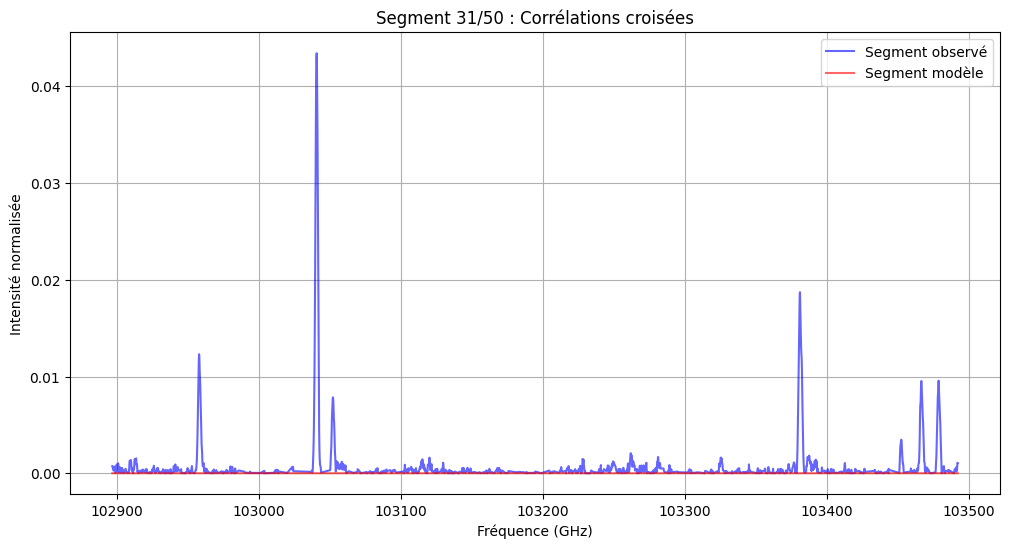

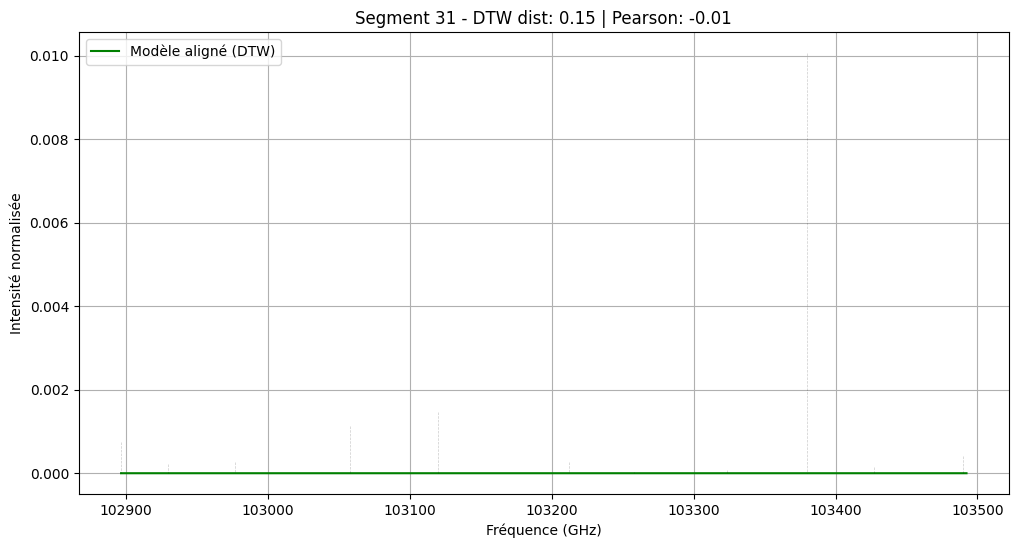

Segment 32/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

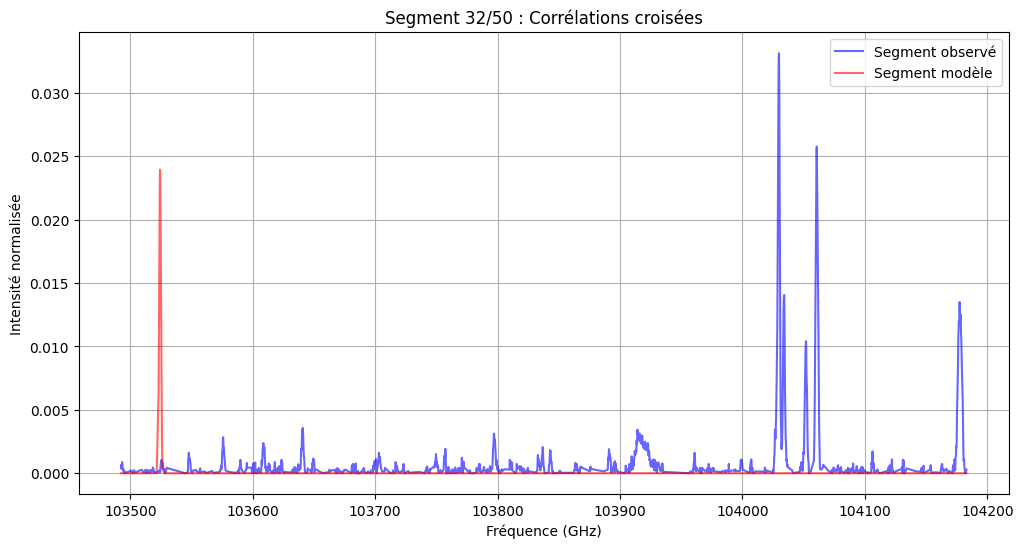

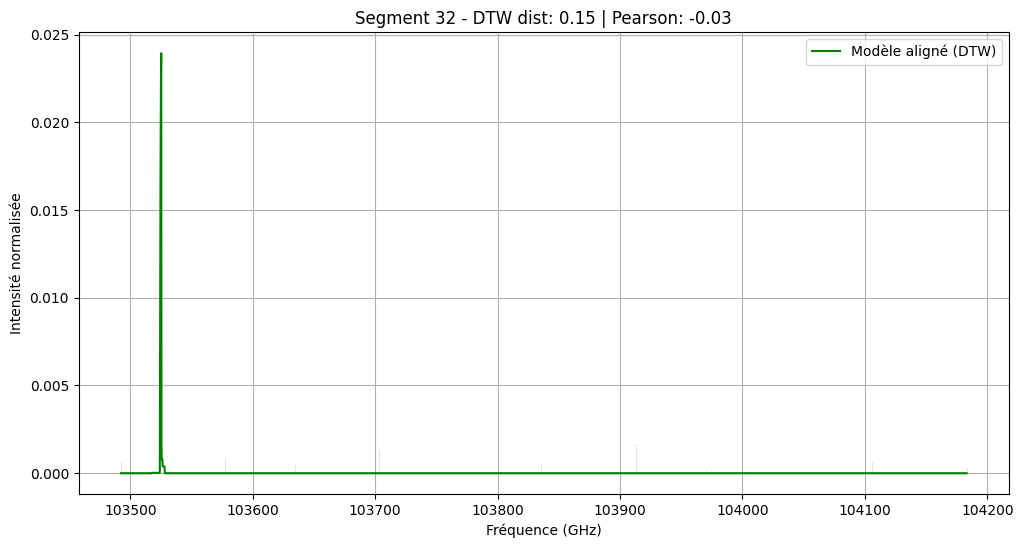

Segment 33/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

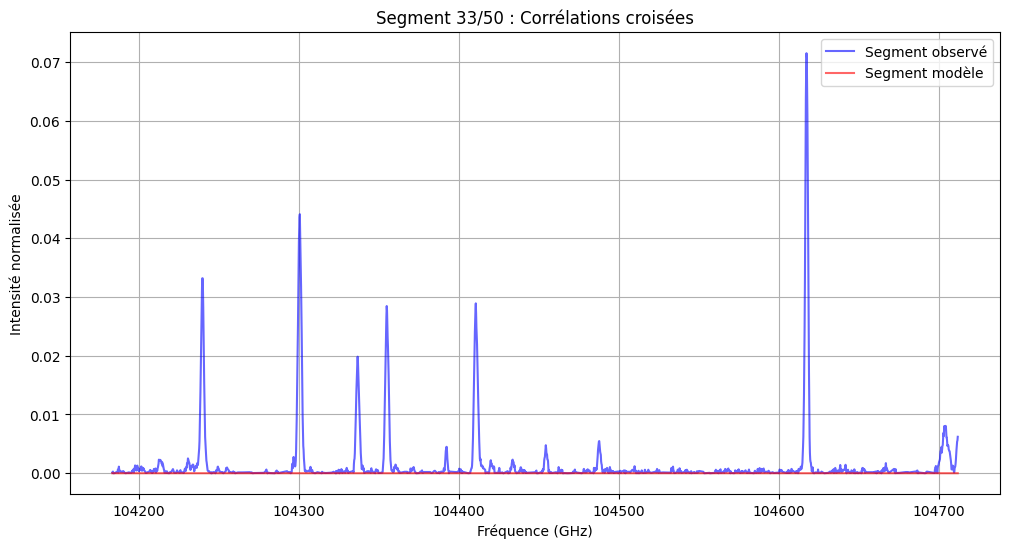

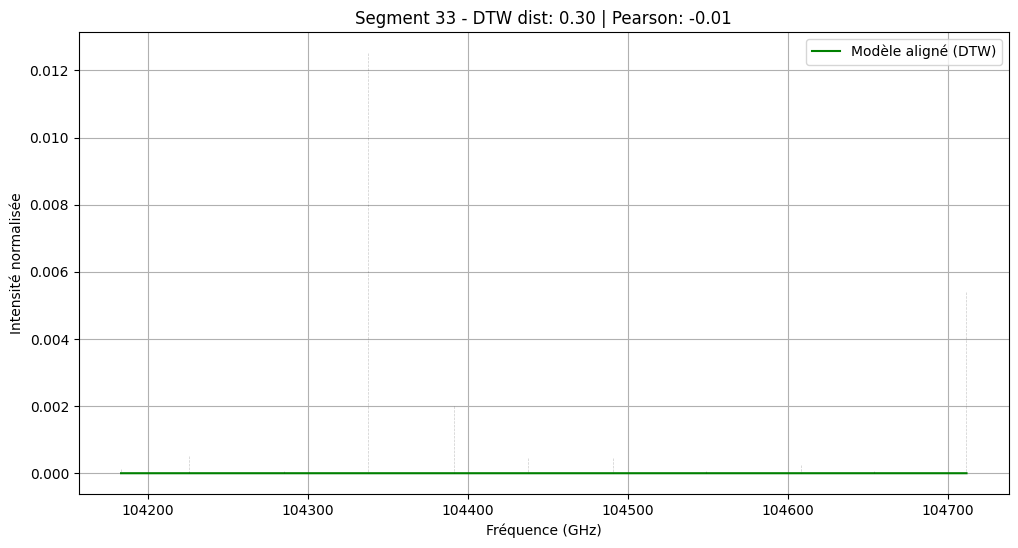

Segment 34/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

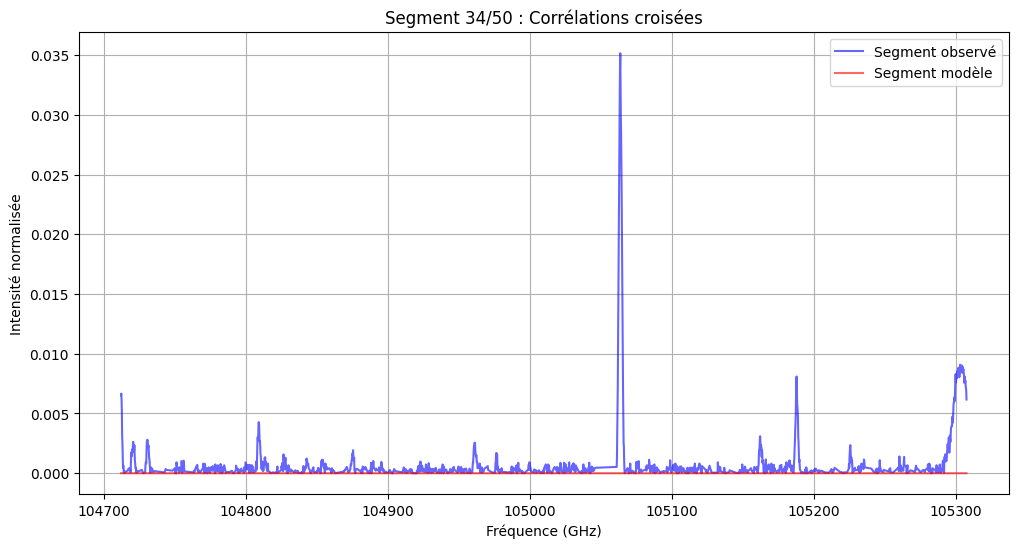

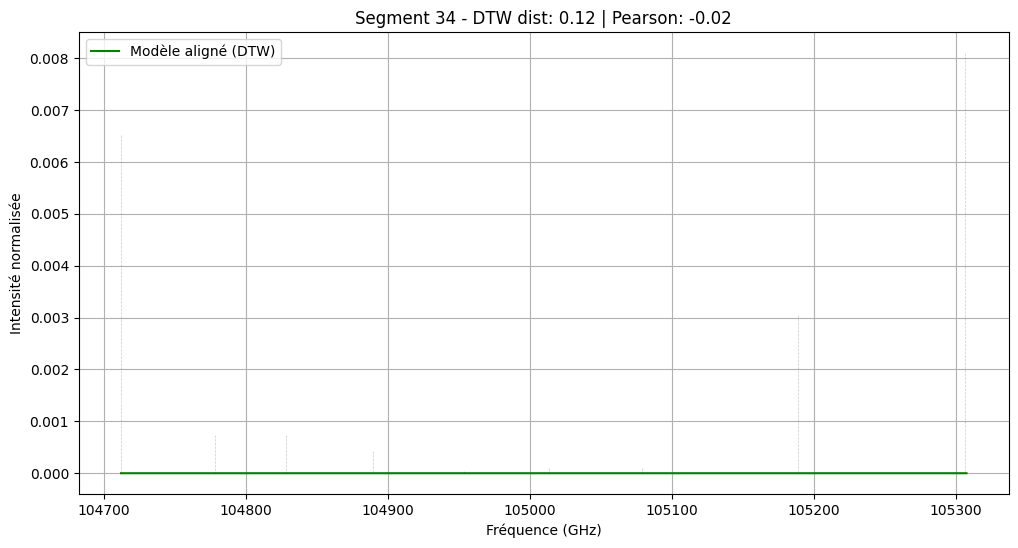

Segment 35/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

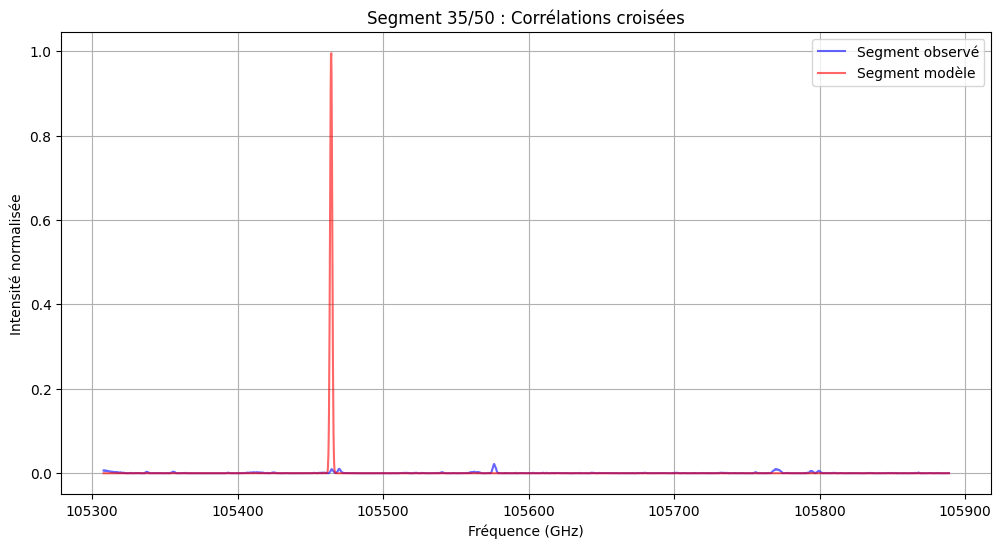

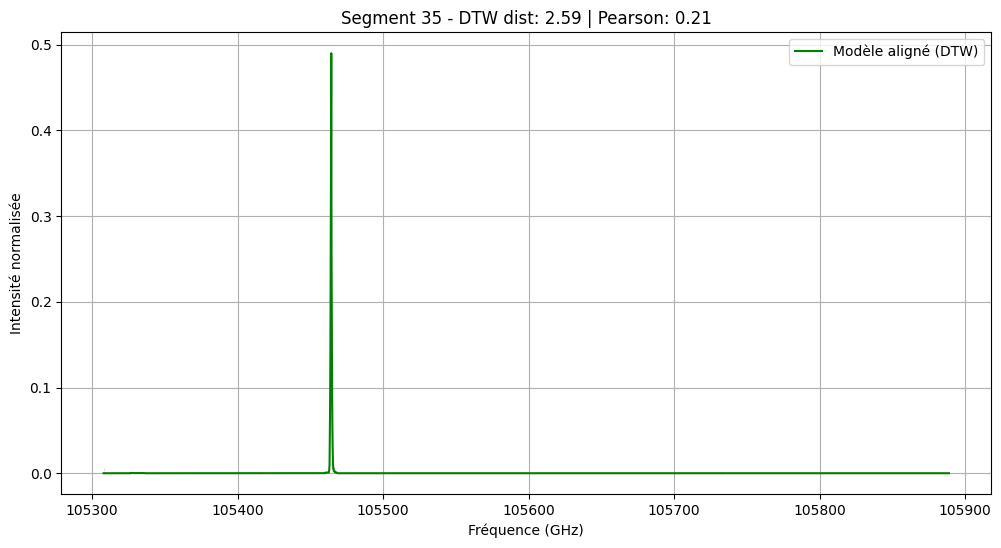

Segment 36/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

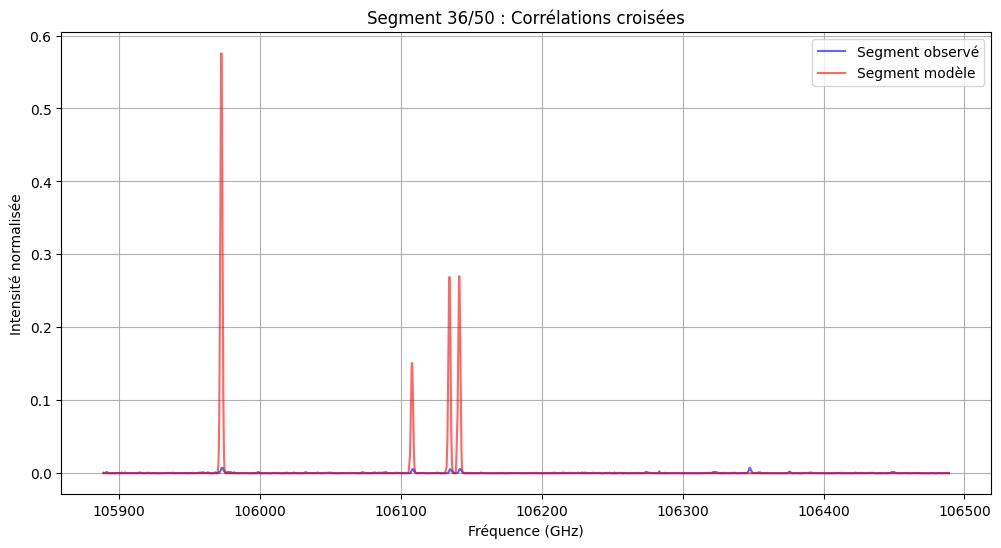

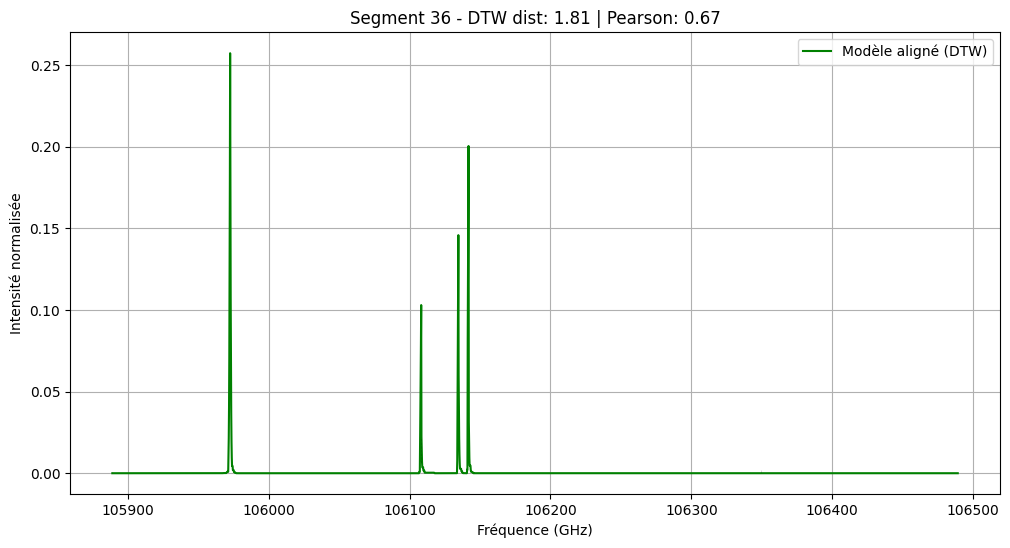

Segment 37/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

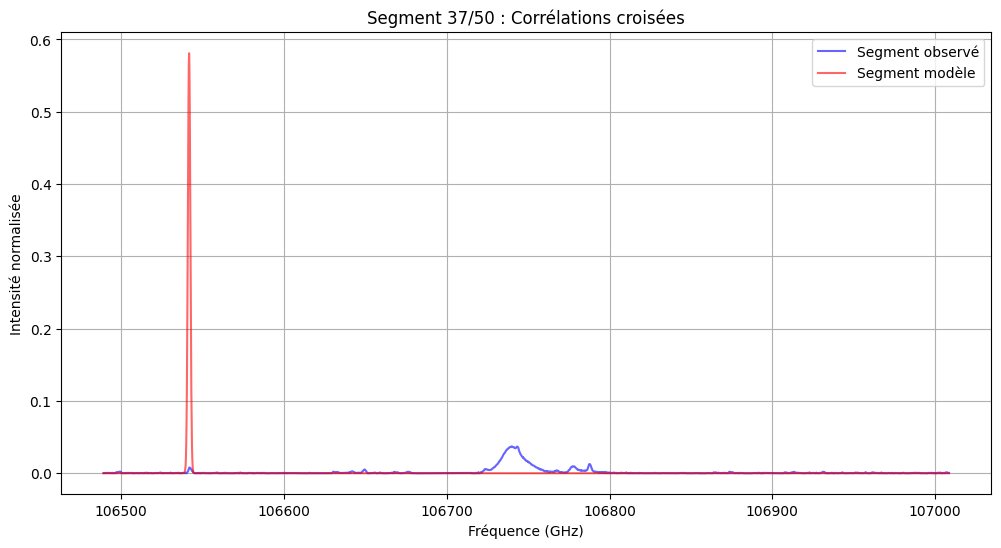

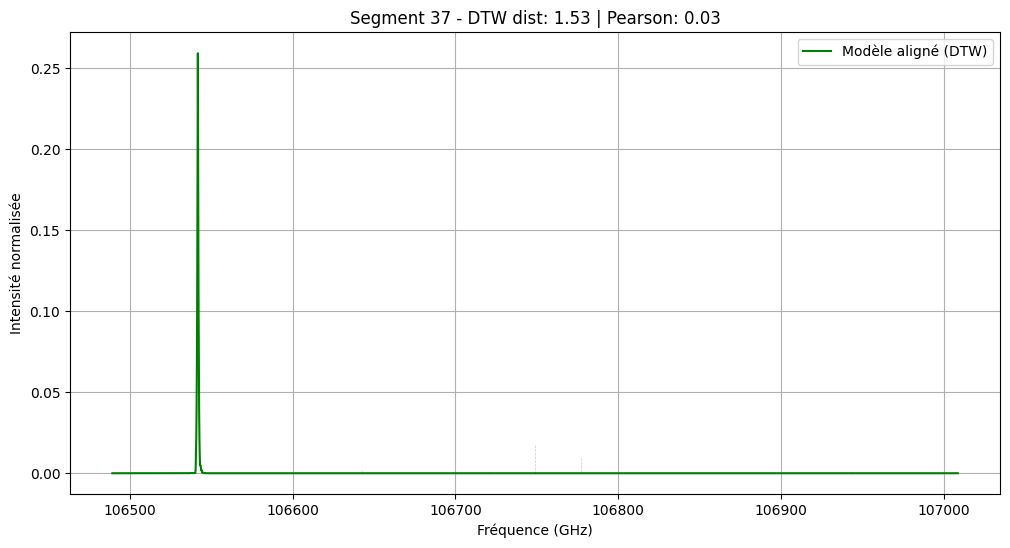

Segment 38/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

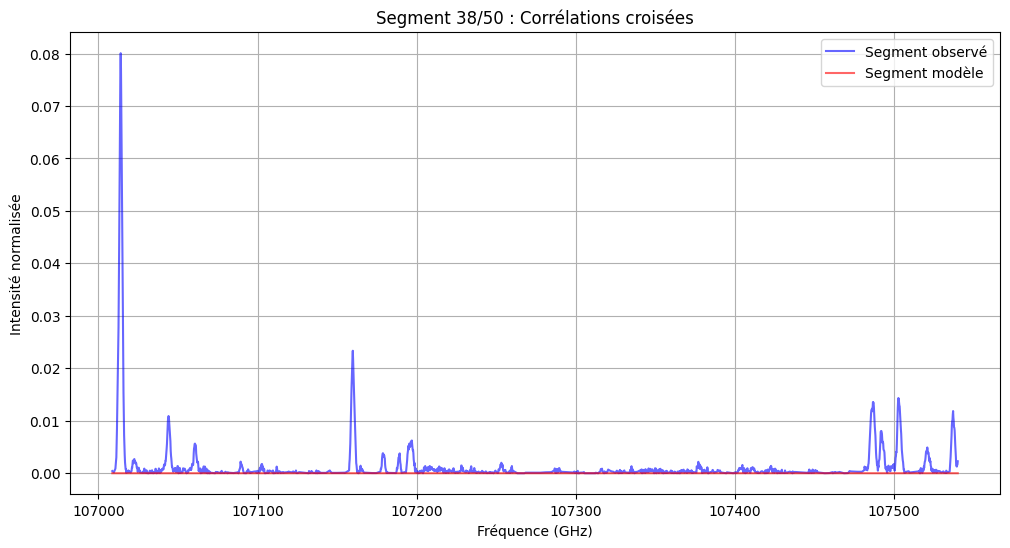

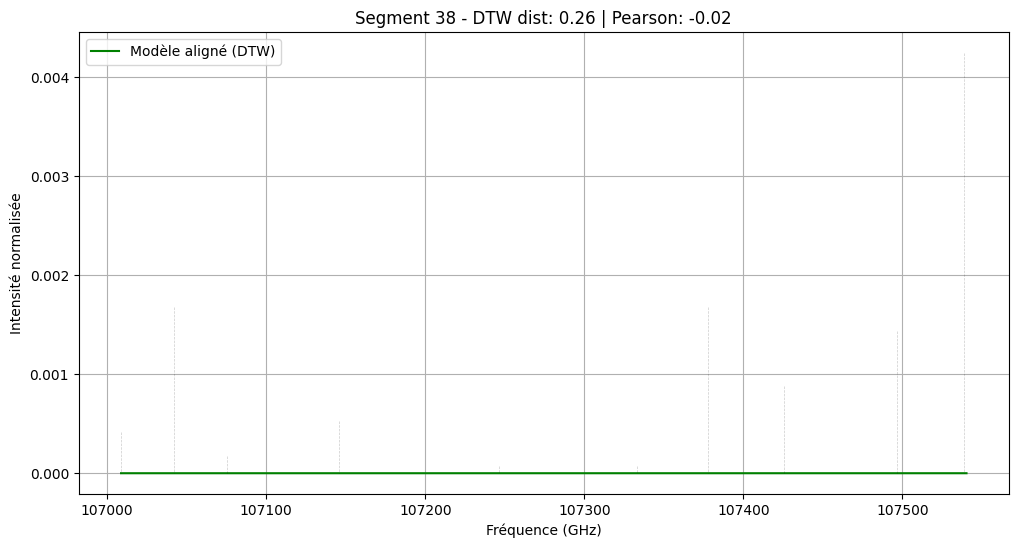

Segment 39/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

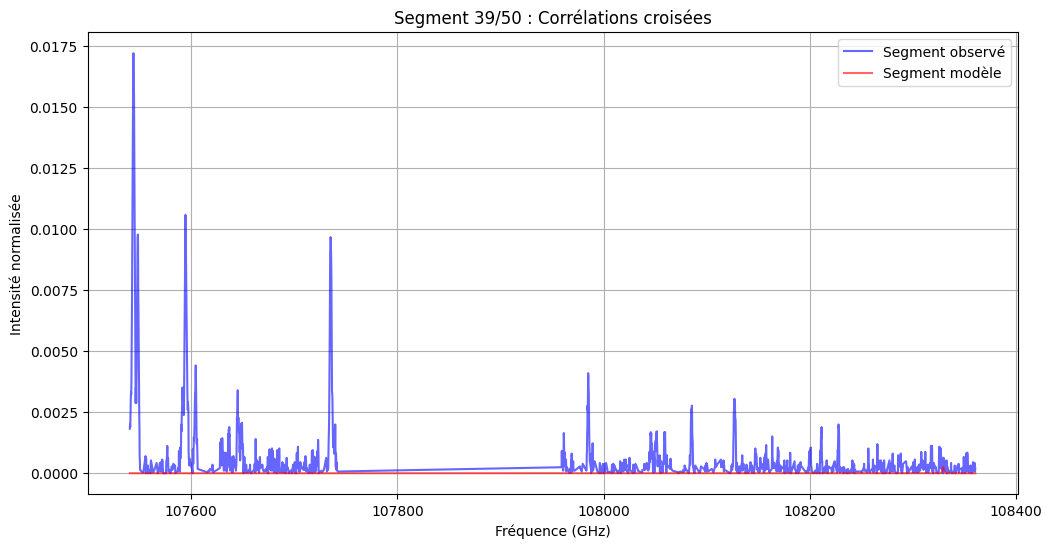

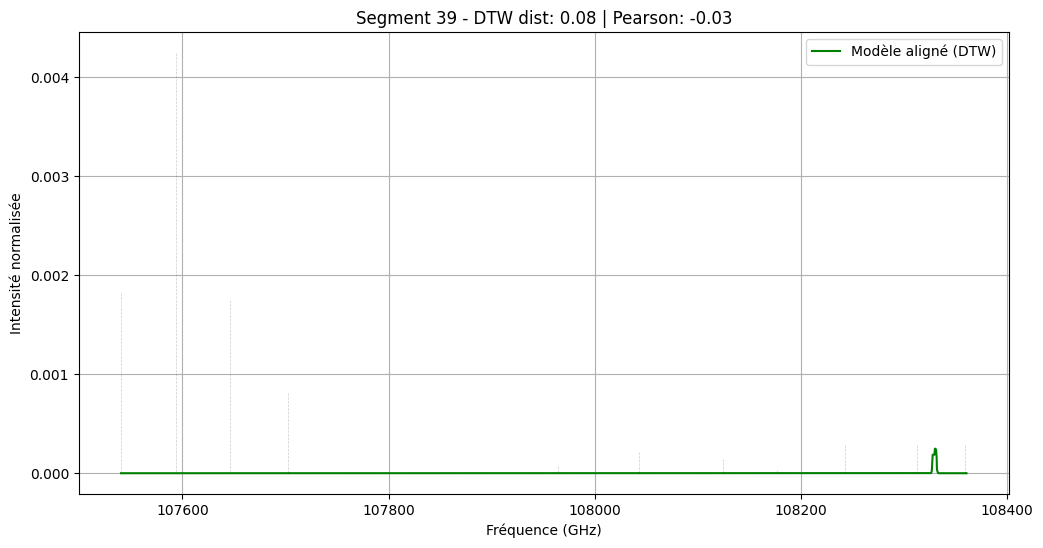

Segment 40/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

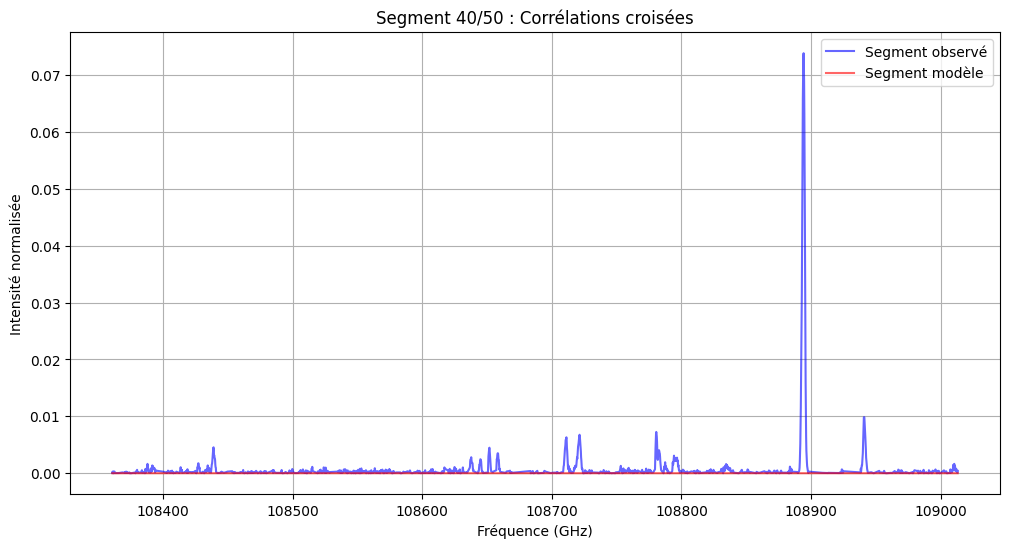

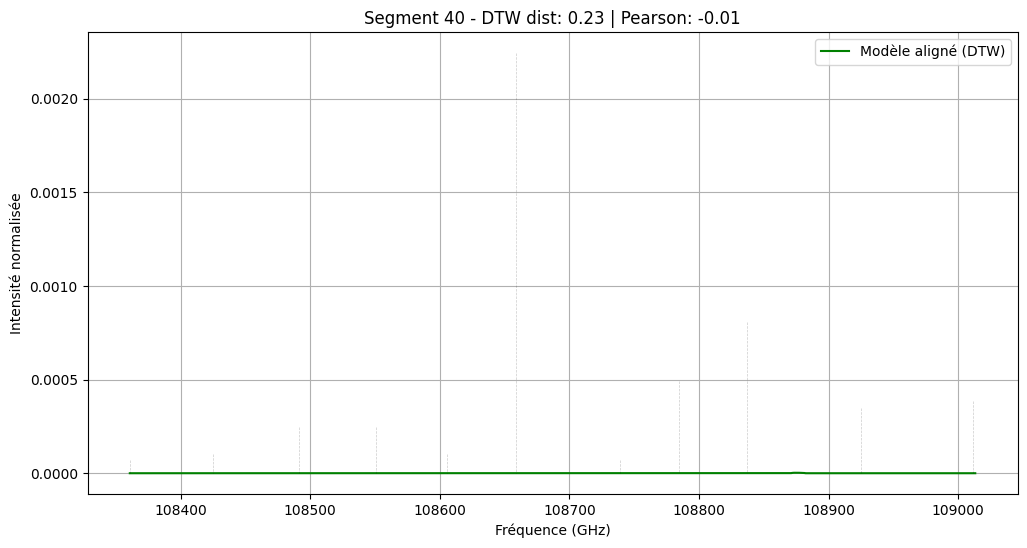

Segment 41/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

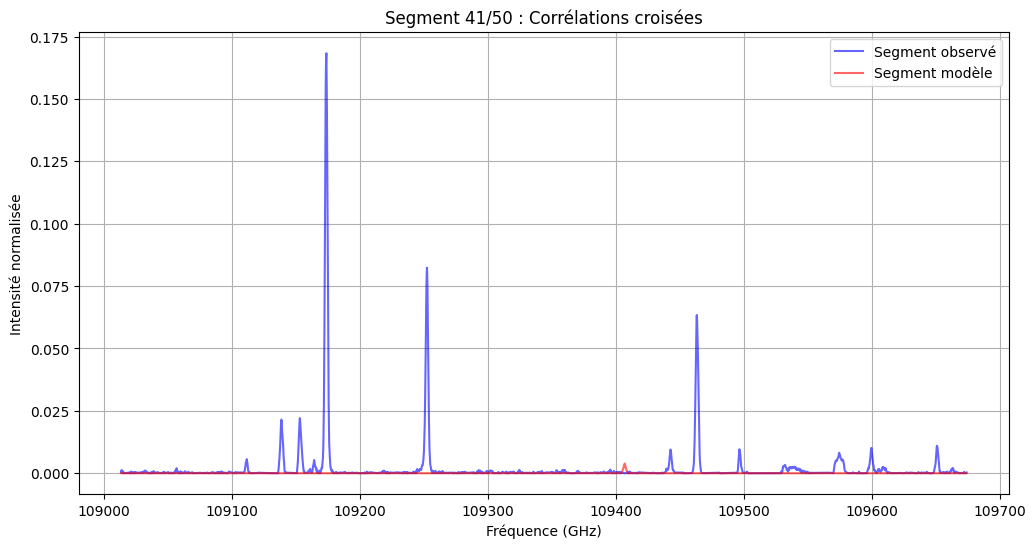

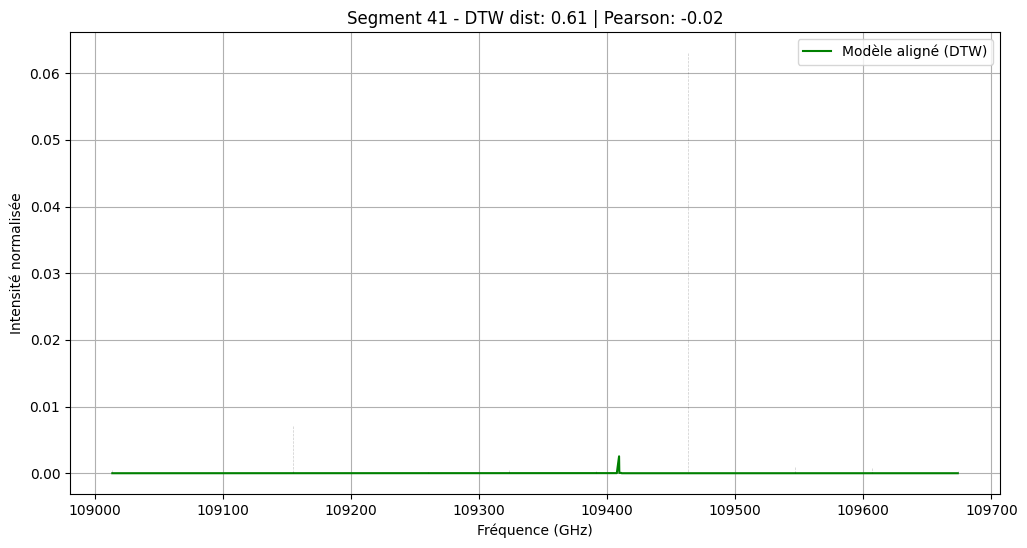

Segment 42/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

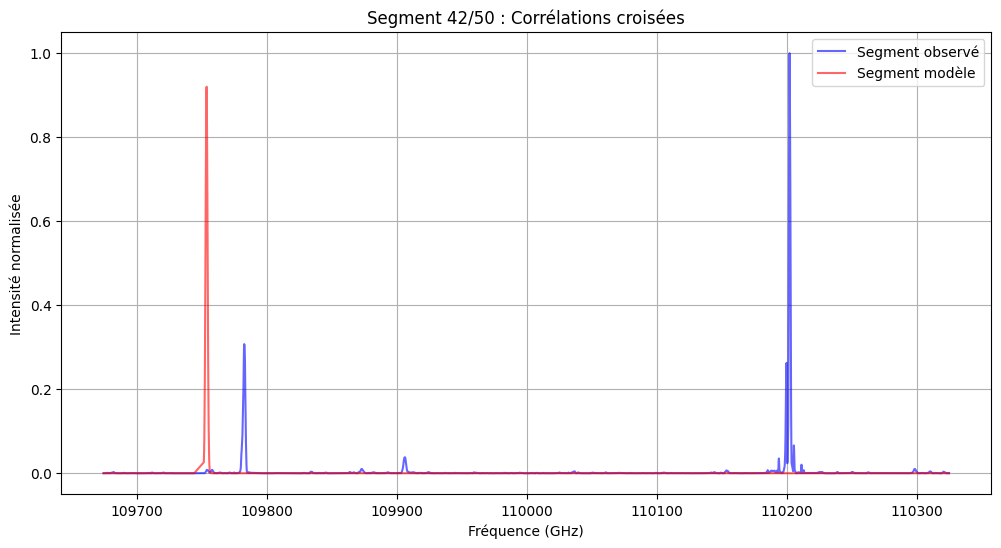

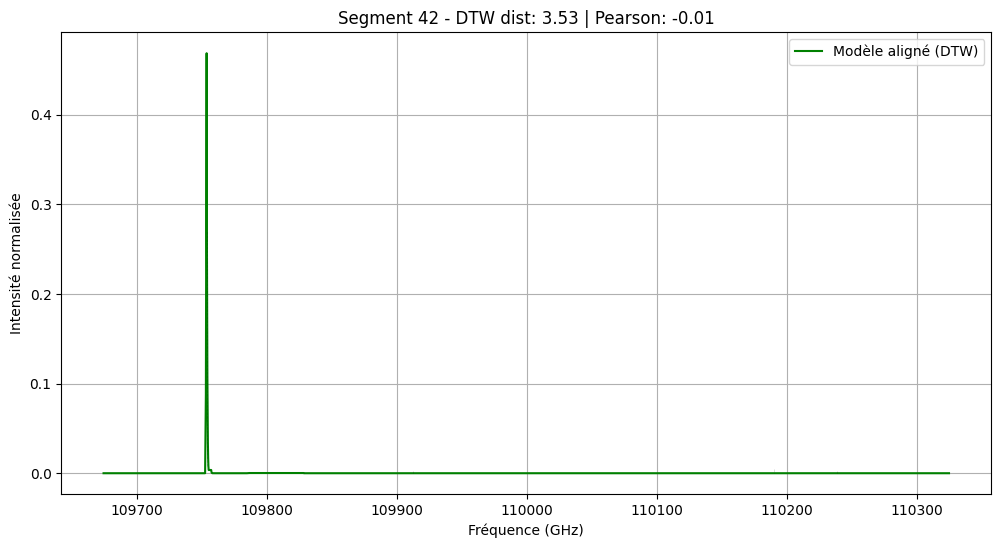

Segment 43/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

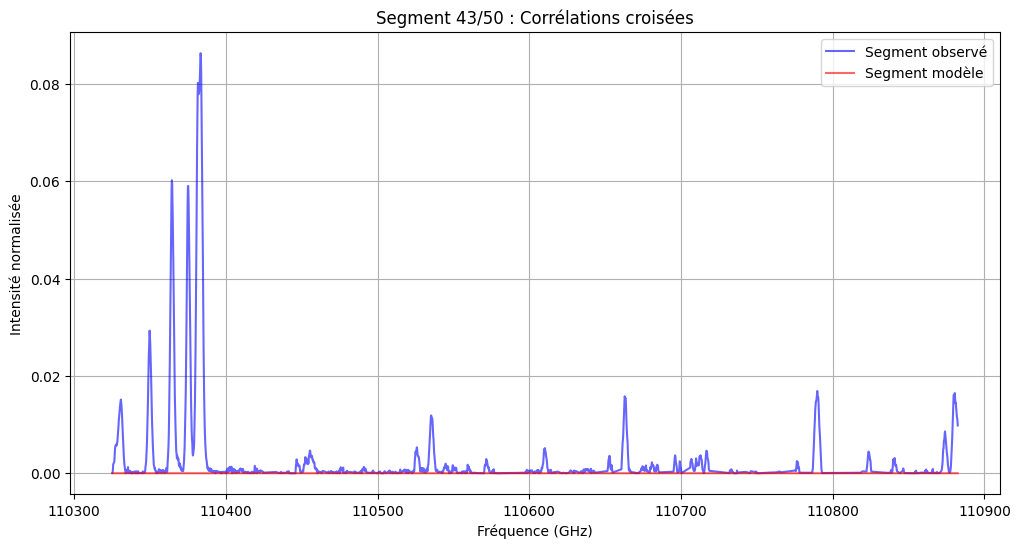

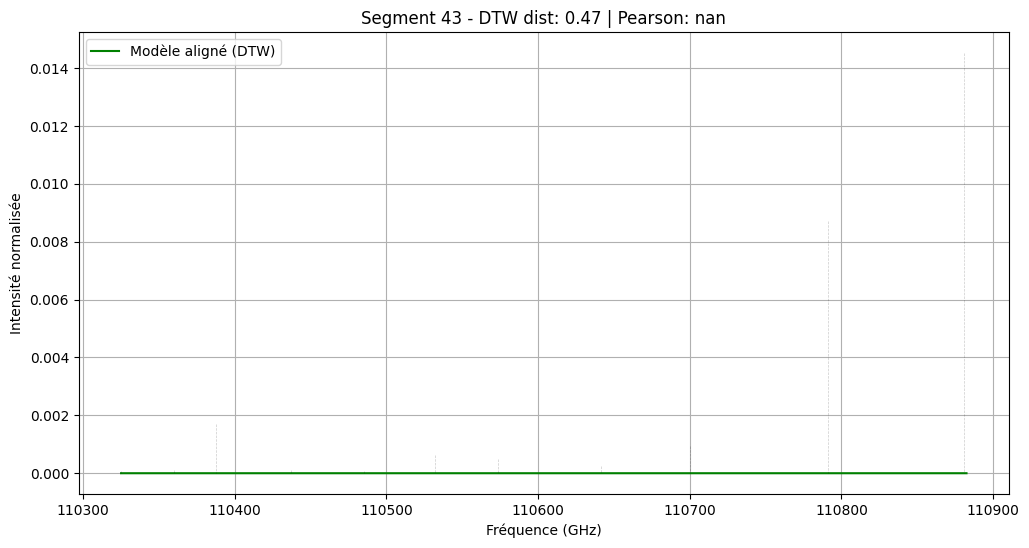

Segment 44/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

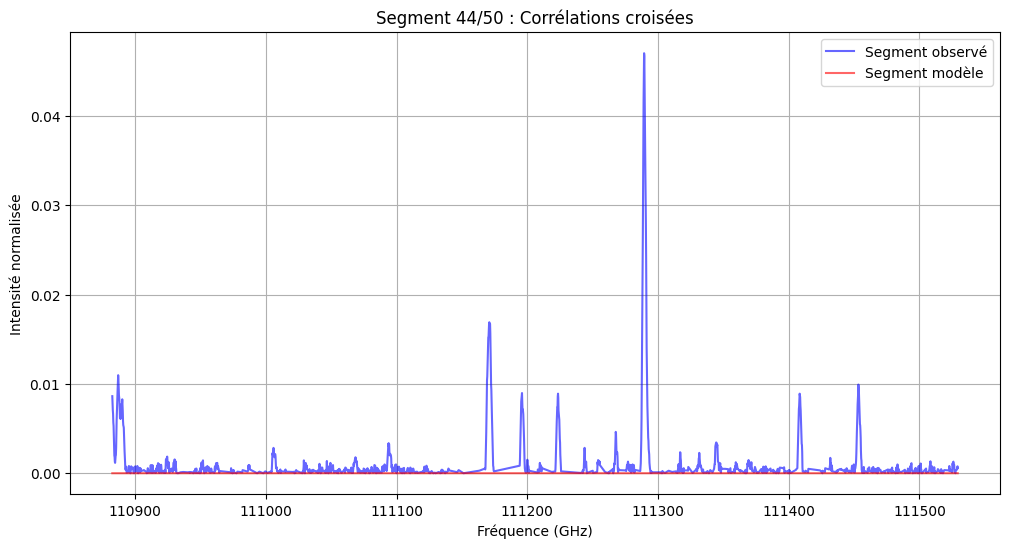

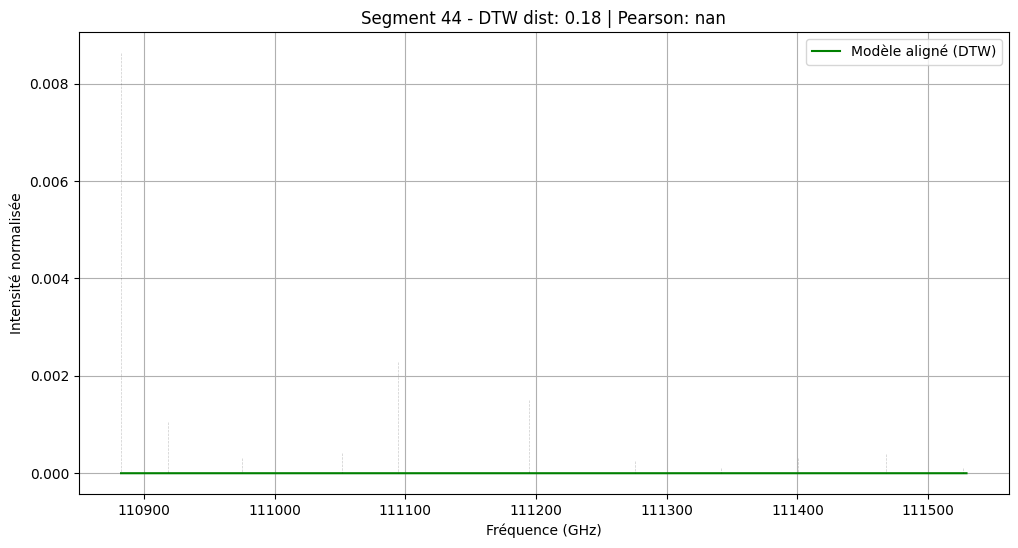

Segment 45/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

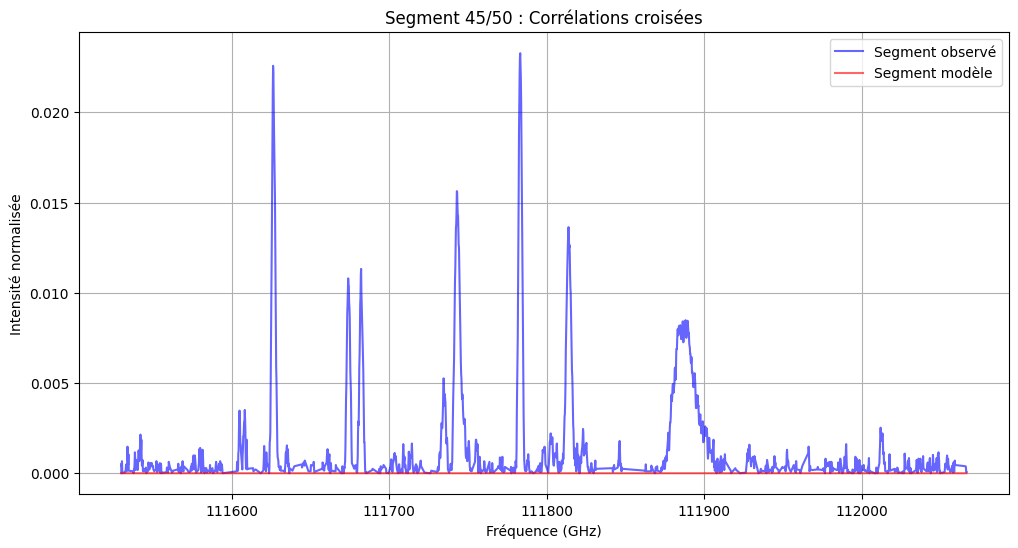

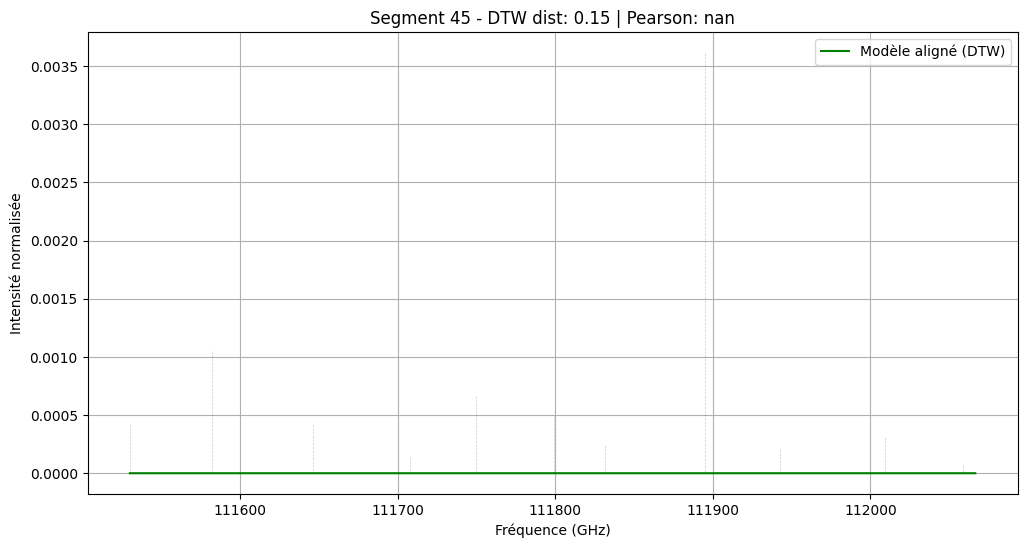

Segment 46/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

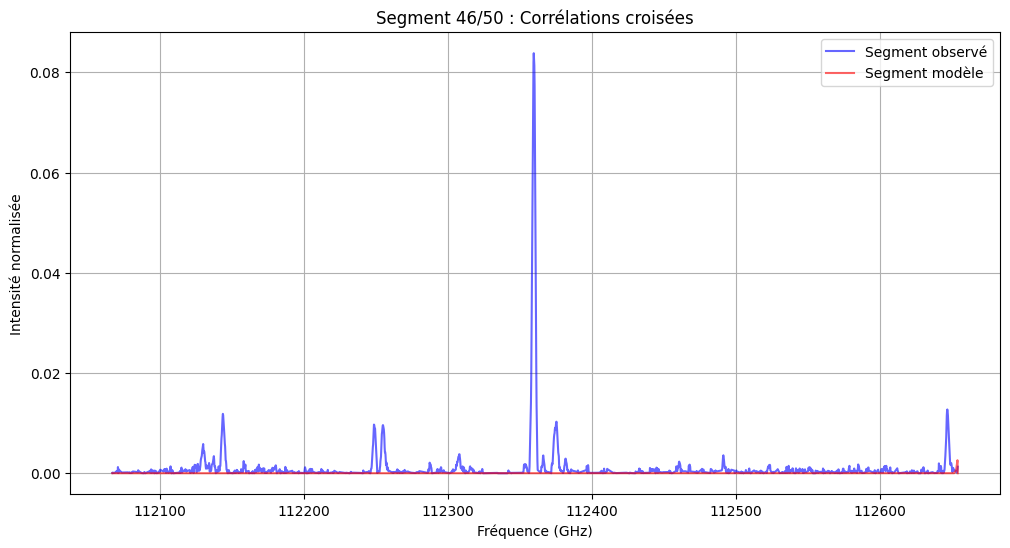

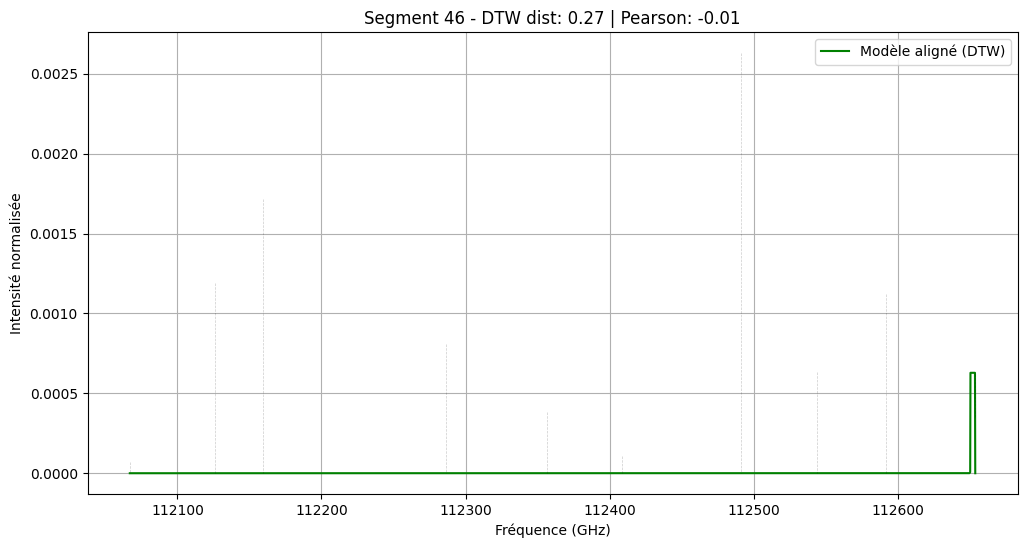

Segment 47/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

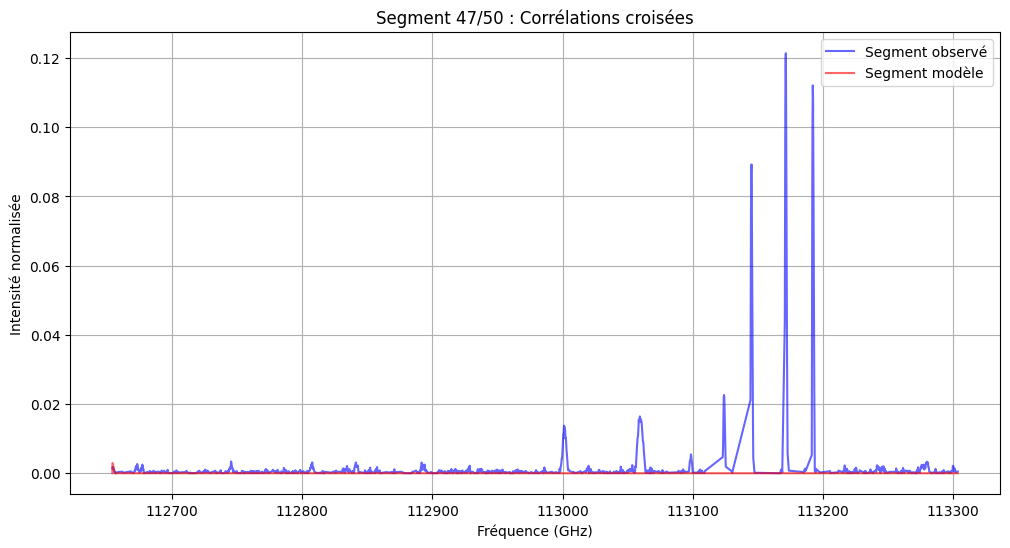

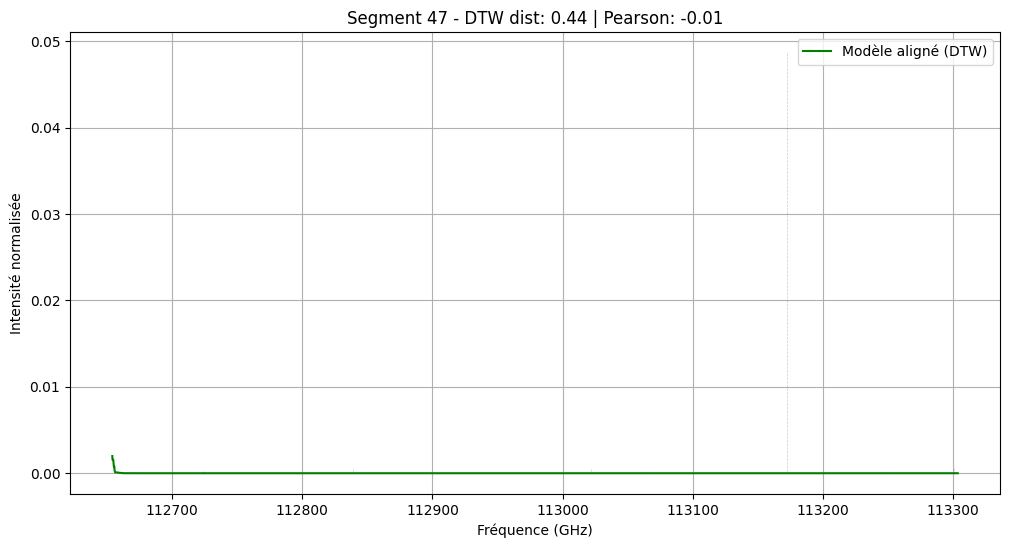

Segment 48/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

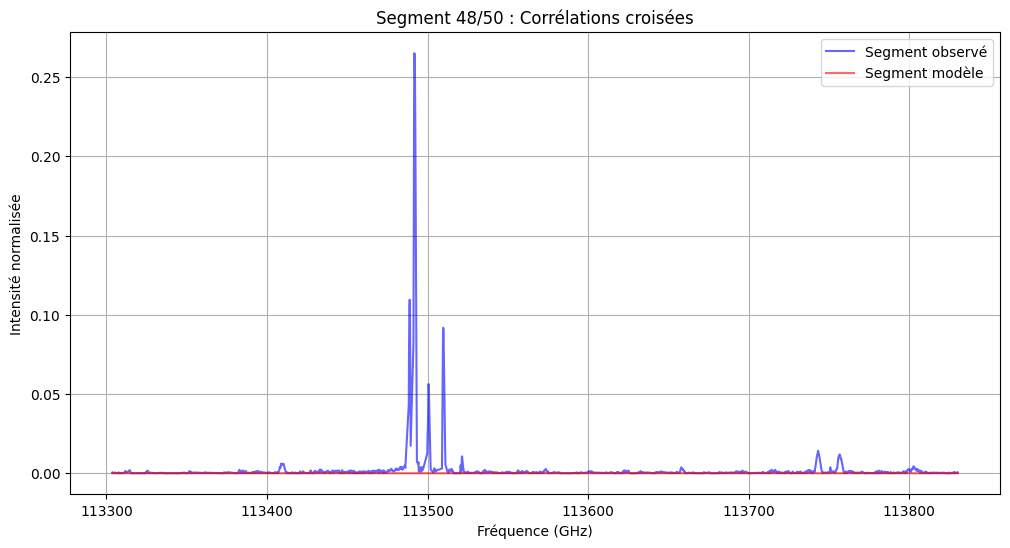

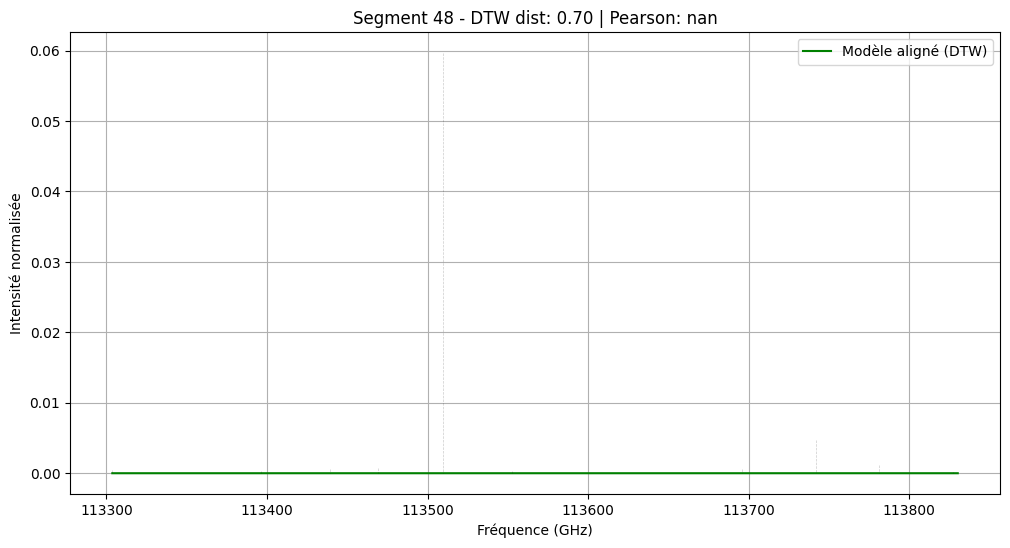

Segment 49/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

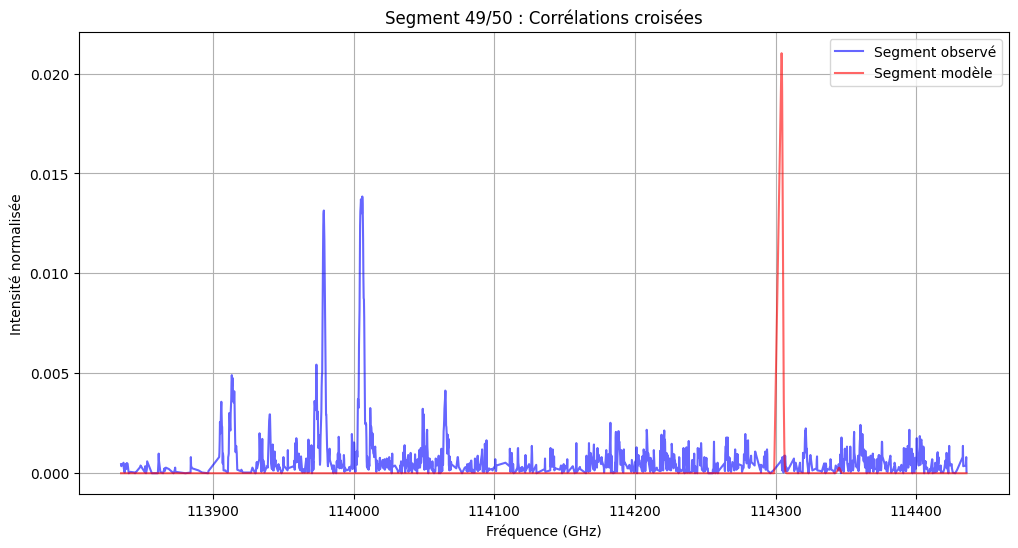

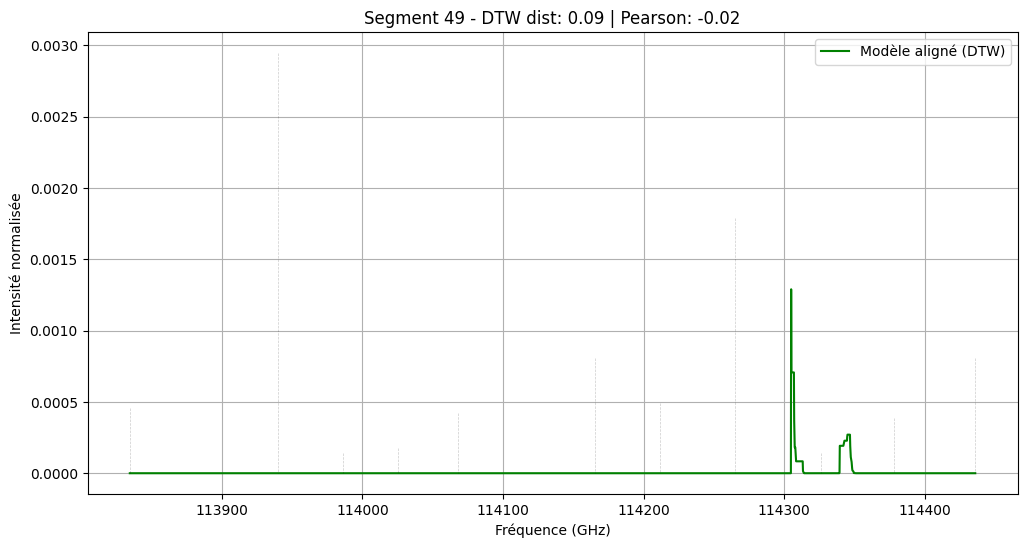

Segment 50/50: DTW distance = [np.float64(3.7309616673025894), np.float64(1.6334346599992184), np.float64(3.270073906004338), np.float64(0.7414280771957747), np.float64(0.259170693439317), np.float64(0.259170693439317), np.float64(3.0468299133332573), np.float64(0.5233987920174527), np.float64(3.0324161314120297), np.float64(0.34062486658311136), np.float64(0.07377932107885964), np.float64(1.2983669638903268), np.float64(1.435876021926518), np.float64(0.5990600201067773), np.float64(1.5389982822770918), np.float64(0.8003807194363017), np.float64(2.578693055167805), np.float64(0.08247981781295942), np.float64(0.052729215983230375), np.float64(0.052729215983230375), np.float64(1.0248419293391626), np.float64(1.0248419293780127), np.float64(0.0439491903798173), np.float64(0.04395397275998974), np.float64(0.4023432730698115), np.float64(0.40234327336057457), np.float64(0.22075417933859232), np.float64(0.22080434482241731), np.float64(0.6368041824426395), np.float64(0.6368031565133682), np.

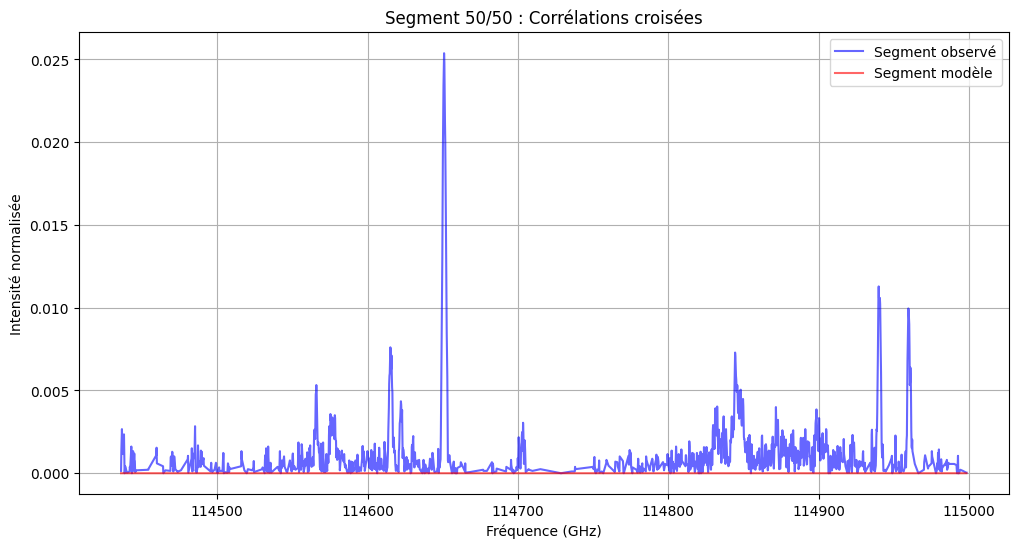

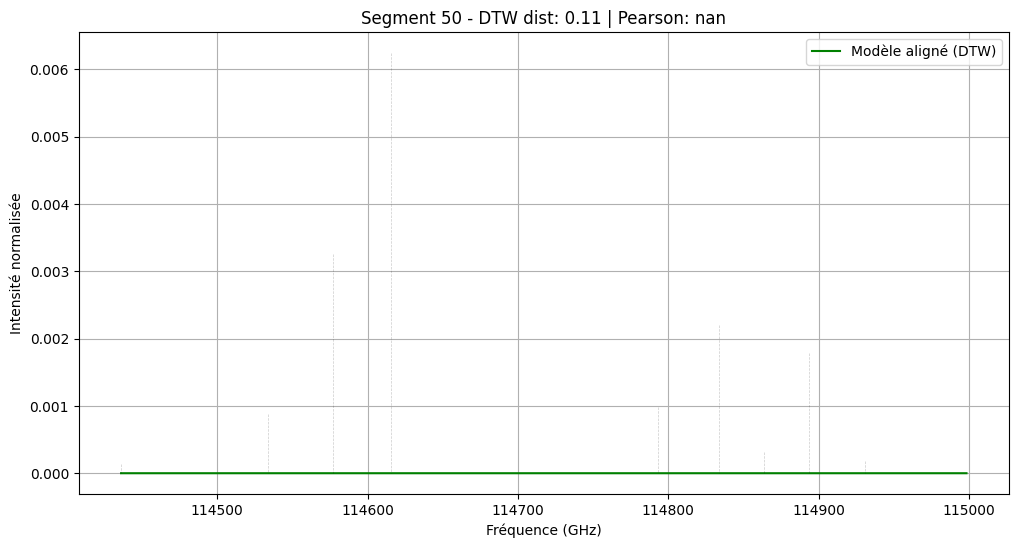



=== RÉSULTATS MOYENS SUR TOUS LES SEGMENTS ===
Pearson moyen: nan
P-value moyenne: nan
Distance DTW moyenne: 0.5976
RMSE moyen: 0.0158
NMAE moyen: 1.7434
Ratio de segments significatifs: 10.0%


In [ ]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

def dtw(s1, s2, window_size = 5):
    n = len(s1)
    m = len(s2)

    w = max(window_size, abs(n - m))

    D = np.full((n+1, m+1), np.inf)
    D[0, 0] = 0

    for i in range(1, n+1):
        for j in range(max(1, i-w), min(m+1, i+w+1)):
            cost = (s1[i-1] - s2[j-1]) ** 2
            D[i, j] = cost + min(D[i-1, j], D[i, j-1], D[i-1, j-1])

    
    path = []
    i, j = n, m
    while i > 0 and j > 0:
        path.append((i-1, j-1))
        min_val = min(D[i-1, j-1], D[i-1, j], D[i, j-1])
        if min_val == D[i-1, j-1]:
            i, j = i-1, j-1
        elif min_val == D[i-1, j]:
            i -= 1
        else:
            j -= 1
    path.reverse()
    
    return np.sqrt(D[n, m]), path 


all_metrics = []



num_segments = 50

segment_length = len(spectrum_norm) // num_segments
results = []

metrics = {
    'pearson': [],
    'p_value': [],
    'dtw': [],
    'rmse': [],
    'nmae': [],
    'is_significant': []
}

dtw_multiple = []

for i in range(num_segments):  
    for file_path, molecule_name in molecules_file_path.items():
        molecule_data = np.loadtxt(file_path)
        freq_molecule = molecule_data[:, 0]
        intensity_molecule = molecule_data[:, 1]
        spectre_model = np.column_stack((freq_molecule, intensity_molecule))

        spectrum_norm = normalize_spectrum(spectrum[:, 1])

        spectrum_model_norm = normalize_spectrum(spectre_model[:, 1])
        
        start_idx = i * segment_length
        end_idx = (i + 1) * segment_length if i < num_segments - 1 else len(spectrum_norm)

        x_segment_obs = spectrum[:, 0][start_idx:end_idx]
        y_segment_obs = spectrum_norm[start_idx:end_idx]

        mask_model = (freq_molecule >= x_segment_obs[0]) & (freq_molecule <= x_segment_obs[-1])
        freq_segment_model = spectre_model[:, 0][mask_model]
        intensity_segment_model = spectrum_model_norm[mask_model]

        interp_model = interp1d(freq_segment_model, intensity_segment_model, 
                            bounds_error=False, fill_value=0)
        model_interp = interp_model(x_segment_obs)

        
    
        dtw_dist, dtw_path = dtw(y_segment_obs, model_interp)
        dtw_multiple.append(dtw_dist)
    

    print(f"Segment {i+1}/{num_segments}: DTW distance = {dtw_multiple}")


    pearson = pearsonr(y_segment_obs, model_interp)[0]
    pearson_pval = pearsonr(y_segment_obs, model_interp)[1]
    
  
    mse = np.mean((y_segment_obs - model_interp) ** 2)
    rmse = np.sqrt(mse)
    nmae = np.mean(np.abs(y_segment_obs - model_interp)) / np.mean(np.abs(y_segment_obs) + 1e-10)

    metrics['dtw'].append(dtw_dist)
    metrics['pearson'].append(pearson)
    metrics['p_value'].append(pearson_pval)
    metrics['rmse'].append(rmse)
    metrics['nmae'].append(nmae)
    metrics['is_significant'].append(pearson_pval < 0.05)

    print(f"\nSegment {i+1}/{num_segments}:")
    print(f"Pearson: {pearson:.4f} (p-value: {pearson_pval:.4f})")
    print(f"RMSE: {rmse:.4f}, NMAE: {nmae:.4f}")
    print("Significatif" if pearson_pval < 0.05 else "Non significatif")  

    plt.figure(figsize=(12, 6))
    plt.plot(x_segment_obs, y_segment_obs, label='Segment observé', color='blue', alpha=0.6)
    plt.plot(x_segment_obs, model_interp, label='Segment modèle', color='red', alpha=0.6)
    plt.xlabel('Fréquence (GHz)')
    plt.ylabel('Intensité normalisée')
    plt.title(f'Segment {i+1}/{num_segments} : Corrélations croisées')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 6))
    aligned_model = np.zeros_like(y_segment_obs)
    for obs_idx, model_idx in dtw_path:
        aligned_model[obs_idx] = model_interp[model_idx]
    plt.plot(x_segment_obs, aligned_model, label='Modèle aligné (DTW)', color='green')

    
    for obs_idx, model_idx in dtw_path[::len(dtw_path)//10]:
        plt.plot([x_segment_obs[obs_idx], x_segment_obs[obs_idx]],
                [y_segment_obs[obs_idx], aligned_model[obs_idx]], 
                'k--', alpha=0.2, linewidth=0.5)

    plt.title(f"Segment {i+1} - DTW dist: {dtw_dist:.2f} | Pearson: {pearson:.2f}")
    plt.legend()
    plt.xlabel('Fréquence (GHz)')
    plt.ylabel('Intensité normalisée')
    plt.grid()
    plt.show()

avg_metrics = {key: np.mean(values) for key, values in metrics.items() if key != 'is_significant'}
signif_ratio = np.mean(metrics['is_significant'])


print("\n\n=== RÉSULTATS MOYENS SUR TOUS LES SEGMENTS ===")
print(f"Pearson moyen: {avg_metrics['pearson']:.4f}")
print(f"P-value moyenne: {avg_metrics['p_value']:.4f}")
print(f"Distance DTW moyenne: {avg_metrics['dtw']:.4f}")
print(f"RMSE moyen: {avg_metrics['rmse']:.4f}")
print(f"NMAE moyen: {avg_metrics['nmae']:.4f}")
print(f"Ratio de segments significatifs: {signif_ratio:.1%}")




## DTW (Dynamic Time Warping)

### CluPA

### LLSA

### COW